# Housing Data Preparation and Analysis

### Author : AFANDI Soufiane 
#### Linkedin : https://www.linkedin.com/in/afandi-soufiane/
--------------------------------------------------------------------------------------------------------------------------------------

**Project overview :**

I am using the ***Scrapy framework*** to scrape datasets from websites offering real estate listings for sales and rentals. The goal is to analyze this data and develop a ***Machine Learning*** model that ***suggests*** listings to clients based on their preferences and financial capabilities. 

This involves extracting relevant features from the listings, such as location, price, property type, and amenities, and using these features to train a ***recommendation system***. 

The system will leverage data analysis, data science techniques, and business intelligence to provide personalized and financially feasible real estate options for clients. 

This project aims to enhance the user experience and optimize the property search process, ultimately driving better business outcomes for real estate platforms.


**Current Notebook :**

In this notebook i am going to prepare a dataset that i scrapped using Scrapy Framework from ***Mubawab*** and ***Avito*** website.

- Mubawab is a leading real estate portal for Morocco. Rent, buy and sell with ease thanks to the widest choice of real estate.

- Avito is the number 1 platform for selling and purchasing goods and services.

# 1. Setup Environment

In [293]:
# !pip install wordcloud

In [294]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]

from collections import Counter
import nltk
from nltk.corpus import stopwords
import seaborn as sns
from datetime import datetime, timedelta
from dateutil import relativedelta

In [295]:
pd.set_option('display.max_colwidth', None)

In [296]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\AFANDI
[nltk_data]     Soufiane\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [297]:
english_stop_words = stopwords.words('english')
french_stop_words = stopwords.words('french')
arabic_stop_words = stopwords.words('arabic')

In [298]:
all_stop_words = english_stop_words+french_stop_words+arabic_stop_words

In [299]:
len(all_stop_words)

1090

**Useful Functions :**

In [300]:
def has_numbers(inputString):
    return bool(re.search(r'\d', inputString))

In [301]:
MOROCCAN_CITIES = [
    "Casablanca", "Rabat", "Fès", "Marrakech", "Agadir", "Tangier", "Meknès",
    "Oujda", "Kenitra", "Tetouan", "Safi", "Khouribga", "Beni Mellal", "El Jadida",
    "Taza", "Nador", "Settat", "Larache", "Ksar El Kebir", "Khemisset", "Guelmim",
    "Errachidia", "Berkane", "Taourirt", "Bouskoura", "Fquih Ben Salah", "Oued Zem",
    "El Kelaa Des Sraghna", "Sidi Slimane", "Guercif", "Oulad Teima", "Ben Guerir",
    "Tifelt", "Lqliaa", "Taroudant", "Sefrou", "Essaouira", "Fnideq", "Sidi Kacem",
    "Tiznit", "Tan-Tan", "Ouarzazate", "Souk El Arbaa", "Youssoufia", "Lahraouyine",
    "Martil", "Ain Harrouda", "Skhirat", "Ouazzane", "Benslimane", "Al Hoceima",
    "Beni Ansar", "M'diq", "Sidi Bennour", "Midelt", "Azrou", "Drargua", "Chefchawn",
    "Zagora", "El Aioun Sidi Mellouk", "Lagouira", "Ras El Ain", "Sidi Ali Ben Hamdouche",
    "Sebt Jahjouh", "Tiddas", "Zaouiat Bougrin", "Tafersit", "Touissit", "Saidia",
    "Lalla Takarkoust", "Skhinate", "Moulay Brahim", "Soualem", "Gueznaia", "Moulay Yacoub",
    "Sidi Allal Tazi", "Laakarta", "Alnif", "Dar El Kebdani", "Jebha", "Ain Erreggada",
    "Sidi Addi", "Skoura", "Smimou", "Ain Jemaa", "Timahdite", "Aït Dawd", "Souk EL Had",
    "Had Bouhssoussen", "Oulad Said", "Arbaoua", "Ain Dorij", "Madagh", "Tighza", "Matmata",
    "Kourouna"
]

# 2. Import Data

In [302]:
file_path = 'market housing full data exported at 01-06-2024 - mubawab and avito.csv'
columns = ["advertisement_url", "title", "publication_date", "price", "location", "features_list", 
           "insert_date", "ad_type", "description", "complete_description"]

In [303]:
mh_dataset = pd.read_csv(file_path, quotechar='#', escapechar='\\', delimiter='|', engine='python',on_bad_lines='skip', header=None)
mh_dataset.columns = columns
mh_dataset.head(3)

,advertisement_url,title,publication_date,price,location,features_list,insert_date,ad_type,description,complete_description
0,https://www.mubawab.ma/fr/a/7808436/arribat-center-appartement-1-chambres-balcon,Arribat Center Appartement 1 chambres balcon,Publié aujourdhui,849 DH par jour,Agdal à Rabat,Type de bien;Appartement;Etat ;Bon état;Étage du bien;1er;Orientation;Ouest;Type du sol;Carrelage,2024-05-23 11:41:46,Vacation Rentals,48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Capacité: 3;1 nuits min.,"Ces appartements nouvellement construits offrent la combinaison parfaite entre beauté et praticité, situés juste à côté du centre commercial de Rabat ""Arribat Center"", avec un emplacement stratégique au cœur d'Agdal. Nous veillerons à ce que vous passiez un séjour merveilleux à chaque visite."
1,https://www.mubawab.ma/fr/a/7808420/beach-sunset-view-appartement-2-chambres,Beach Sunset View Appartement 2 chambres,Publié aujourdhui,1 999 DH par jour Baisse du prix 401 DH,Secteur Touristique à Agadir,Type de bien;Appartement;Etat ;Bon état;Étage du bien;2ème;Orientation;Nord;Type du sol;Carrelage,2024-05-23 11:42:09,Vacation Rentals,120 m² ;3 Pièces;2 Chambres;2 Salles de bains;Capacité: 6;1 nuits min.,"Nouvel appartement luxueux et relaxant de 2 chambres à Agadir pour les voyageurs appréciant le confort, décoré avec goût et souci du détail, offrant une vue époustouflante sur l'océan."
2,https://www.mubawab.ma/fr/a/6343021/appartement-au-coeur-de-ma%C3%A2rif,Appartement au coeur de Maârif,Publié aujourdhui,500 DH par jour,Maârif à Casablanca,Type de bien;Appartement;Etat ;Nouveau;Étage du bien;1er;Type du sol;Marbre,2024-05-23 11:42:09,Vacation Rentals,60 m² ;1 Pièce ;1 Chambre;1 Salle de bain;Capacité: 2;10 nuits min.,"Charmant et luxueux studio, entièrement meublé, il offre tout le confort nécessaire pour un séjour agréable et mémorable. Idéalement situé à Maârif, vous trouverez à proximité restaurants, cafés, supermarché, magasins, pressing, boulangerie, ..."


**Overview :** 

The above dataset that i have scrapped using Scrapy Framework took me 3-4 days (~ 1h per day = 3-4 hours in general), on two real estate websites in Morroco (Avito - Mubawab), just to start using data cleaning process so that i can automate this process in the future.

**Data Description :**

This dataset contains :

- *<u>advertisement_url</u>* : Which is the full URL of the page in the website on which i retrieve detailed information on the current real estate announcement.

- *<u>title</u>* : The title of the property advertisement.

- *<u>publication_date</u>* : The date the advertisement was published by its owner.

- *<u>price</u>* : The price of the property (in ***DH*** = Moroccan ***D***ir***H***am : the official monetary currency of Morocco).

- *<u>location</u>* : The exact location of the property.

- *<u>description</u>* : Detail parts of the property.
 
- *<u>complete_description</u>* : Complete description of the property established by its owner.

- *<u>features_list</u>* : A liste of The property type (Apartment, House, Villa, farmhouse, ...),  property state, number of floors ...

- *<u>insert_date</u>* : The Date the current announcement was scrapped.

In [304]:
mh_dataset.shape

(14618, 10)

In [305]:
mh_dataset.isnull().sum()

advertisement_url          0
title                      0
publication_date           0
price                      0
location                   0
features_list              0
insert_date                0
ad_type                 7509
description             7509
complete_description       0
dtype: int64

**Notice :**

The 7509 rows which have null value in 'description' and 'ad_type' columns, were caused because of the scrape failure. (Scrapy can't scrap svg element ... but i still work on it for future updates, trying to solve it using Selenium with Scrapy).

In [306]:
mh_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14618 entries, 0 to 14617
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   advertisement_url     14618 non-null  object
 1   title                 14618 non-null  object
 2   publication_date      14618 non-null  object
 3   price                 14618 non-null  object
 4   location              14618 non-null  object
 5   features_list         14618 non-null  object
 6   insert_date           14618 non-null  object
 7   ad_type               7109 non-null   object
 8   description           7109 non-null   object
 9   complete_description  14618 non-null  object
dtypes: object(10)
memory usage: 1.1+ MB


# 3. Data Cleaning

## 3.1 Remove duplicate records

We'll start by checking overall duplicates records in my dataset.

In [307]:
sum(mh_dataset.duplicated())

0

We found **no duplicate records** in our dataset, but **I believe this does not reflect reality**. If two records are essentially the same but differ in just one field <i>**[**<u>which in this case is going to be 'advertisement_url</u>**]**</i>, they are not identified as duplicates. In practice, some people **repost** their real estate ads multiple times on these websites, causing them to appear multiple times for visitors.

In [308]:
sum(mh_dataset['advertisement_url'].duplicated())

2750

we found 2750 duplicate records.

In [309]:
mh_dataset = mh_dataset[~mh_dataset['advertisement_url'].duplicated()]
mh_dataset.reset_index(drop=True, inplace=True)

In [310]:
sum(mh_dataset['advertisement_url'].duplicated())

0

Let's delve deeper into our dataset and examine other columns for potential duplicates. I will focus on the 'title' column because individuals tend to repost the same ad multiple times with identical or very similar titles. By analyzing this column, we might identify records that are essentially duplicates despite differences in other fields.

In [311]:
sum(mh_dataset['title'].duplicated())

1098

As we say, we found 1098 duplicate records.

In [312]:
mh_dataset[mh_dataset['title'].duplicated()]

,advertisement_url,title,publication_date,price,location,features_list,insert_date,ad_type,description,complete_description
133,https://www.mubawab.ma/fr/a/7920370/bel-appartement-en-location-de-vacances,Bel appartement en location de vacances,Publié aujourdhui,1 200 DH,Agdal à Marrakech,Type de bien;Appartement;Etat ;Bon état;Étage du bien;2ème;Type du sol;Marbre,2024-05-23 12:00:14,Vacation Rentals,87 m² ;4 Pièces;2 Chambres;2 Salles de bains;Capacité: 6;2 nuits min.,Bel appartement en location de vacances se compose de :* 02 chambre meublées*02 salles de bain* Une cuisine équipéel'appartement est destiné au couple avec ou sans enfants Cet charmante appartement est sur une résidence fermée sécurisée de haut standingNous sommes disponible pour accueillir vos demande selon la disponibilité.Heureux de vous recevoir dans notre jolie appartement cousis
191,https://www.mubawab.ma/fr/a/7859057/joli-appartement-%C3%A0-louer,Joli appartement à louer,Publié il y a 1 jour,400 DH par jour,Centre Ville à Mohammedia,Type de bien;Appartement;Etat ;Nouveau;Orientation;Sud,2024-05-23 12:08:00,Vacation Rentals,60 m² ;2 Pièces;1 Chambre;1 Salle de bain;Capacité: 4;1 nuits min.,"Important je loue tout mes appartements juste pour les familles avec acte de mariage obligatoire, donc attention pour les couples Si vous n’avez pas l’acte de mariage svp ne me contacter jamais ni par tel ni par whatsapp, merci.Dans une résidence fermée et sécurisée Je met en location ce nouveau et magnifique appartement très bien meublé, entièrement équipée et bien ensoleillé .1 chambre à coucher moderne1 salon très confortable même pour faire dormir plusieurs personnes1 salle de bains à l’italienne1 cuisine moderne bien équipée.avec grande smart TV 55 pousse , wifi , machine a laver , chauffage et climatiseur , garage sécurisé , ascenseur , résidence fermé .L’appartement se trouve au rez-de-chaussée, en face de la piscine et la résidence est bien situé, juste à côté de aswak assalam.j'ai plusieurs appartements dans les meilleurs quartiers de mohammedia et je suis le propriétaire .attention les prix sont toujours variables selon le type d'appartement choisi , selon les quartiers , la saison et la durée du séjour bien sûr.Mr ISSAM HILALI."
217,https://www.mubawab.ma/fr/a/7919438/appartement-familiale-centre-ville-vue-sur-plage,Appartement Familiale Centre Ville Vue Sur Plage,Publié il y a 1 jour,400 DH par jour,De La Plage à Tanger,Type de bien;Appartement;Etat ;Bon état;Étage du bien;2ème;Type du sol;Marbre,2024-05-23 12:11:35,Vacation Rentals,95 m² ;5 Pièces;3 Chambres;2 Salles de bains;Capacité: 11;1 nuits min.,Appartement Location Vacances Centre Ville De Tanger Vue Sur Plage400 Dhs Par jour Pour Les Familles Où Personnes Sérieux Gsm : 06 91 39 55 33
255,https://www.mubawab.ma/fr/a/7894867/villa-rte-ourika-piscine-priv%C3%A9e-8-pers,Villa Rte Ourika Piscine Privée 8 Pers,Publié il y a 2 jours,2 500 DH,Route de l'Ourika à Marrakech,Type de bien;Villa;Etat ;Nouveau,2024-05-23 12:16:40,Vacation Rentals,200 m² ;5 Pièces;4 Chambres;2 Salles de bains;Capacité: 2;2 nuits min.,"Référence : 24OLVS031 Nom : Villa Rte Ourika Emplacement : Km 25 Route Ourika Douar Sidi Bouyahia, Aghmat 42250 Capacité : 8 personnes Piscine : Oui (privée) Climatisation : Oui Parking : Oui Référence : 24OLVS031 Type : Famille La Villa Rte Ourika (référence : 24OLVS031) est située à Km 25 de la Route Ourika, à Aghmat. Cette villa spacieuse peut accueillir jusqu'à 4 personnes et est idéale pour les familles. Elle dispose d'une piscine privée où vous pourrez vous détendre et profiter du soleil. La villa est entièrement équipée avec la climatisation pour assurer votre confort, et le parking est disponible pour vos véhicules. Vous pourrez profiter d'un séjour paisible dans cette belle villa, entourée par la nature pittoresque de la région d'Aghmat. Pour plus d'informations ou pour réserver, veuillez contacter le numéro de téléphone indiqué ()."
292,https://www.mubawab.ma/fr/a/7918275/appartement-haut-s

**As we notice here, there are duplicate records. and it must be deleted so as not to distort our analysis in the future.**

In [313]:
mh_dataset = mh_dataset[~mh_dataset['title'].duplicated()]
mh_dataset.reset_index(drop=True, inplace=True)

In [314]:
sum(mh_dataset['title'].duplicated())

0

We have finished our examination using the 'title' column. Now, let's move on to analyzing the 'description' column. This analysis might help us identify additional duplicates, as individuals who repost their ads often use the same or very similar descriptions.

Note: We are not examining the 'price,' 'surface,' 'location,' or 'publication_date' columns because multiple real estate listings can have the same price, surface area, location, or publication date.

In [315]:
sum(mh_dataset['description'].duplicated())

7915

In [316]:
mh_dataset[mh_dataset['description'].duplicated()][:2]

,advertisement_url,title,publication_date,price,location,features_list,insert_date,ad_type,description,complete_description
28,https://www.mubawab.ma/fr/a/7810811/studio-chaleureux-au-c%C5%93ur-de-la-ville,Studio Chaleureux au Cœur de la Ville,Publié aujourdhui,17 999 DH,Maârif à Casablanca,Type de bien;Appartement;Etat ;Nouveau;Type du sol;Parquet,2024-05-23 11:45:38,Vacation Rentals,30 m² ;1 Pièce ;1 Chambre;1 Salle de bain;Capacité: 2;1 nuits min.,"Ce charmant studio offre une atmosphère chaleureuse et accueillante, conçue pour le confort et la détente.Situé dans un emplacement privilégié, à proximité des commerces et des restaurants."
30,https://www.mubawab.ma/fr/a/7808651/apartment-confort-d-une-chambre-gauthier,Apartment confort d'une chambre Gauthier,Publié aujourdhui,20 399 DH par jour,Maârif à Casablanca,Type de bien;Appartement;Etat ;Bon état;Étage du bien;2ème;Type du sol;Carrelage,2024-05-23 11:46:00,Vacation Rentals,40 m² ;2 Pièces;1 Chambre;1 Salle de bain;Capacité: 4;1 nuits min.,"Séjournez dans un lieu haut de gamme, proche de tous les endroits que vous souhaitez visiter, avec un emplacement stratégique au cœur du quartier Gauthier. Vous allez adorer le décor élégant de ce lieu charmant. Nous veillerons à ce que vous passiez un séjour merveilleux à chaque fois."


**The "description" column is not as reliable as the "title" column for detecting duplicate records. As we observed earlier, even when two records have the same "description," they can still be different ads. Therefore, relying on the "description" column might not be effective for identifying duplicates in our dataset.**

## 3.2 remove '\n' and '\t' characters in the dataset

===> This code bloc is disabled for future commits ... because, i've automated this data cleaning process inside the spider using **ItemLoaders**.

In [317]:
# mh_dataset['title'] = mh_dataset['title'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['publication_date'] = mh_dataset['publication_date'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['price'] = mh_dataset['price'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['location'] = mh_dataset['location'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['description'] = mh_dataset['description'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['complete_description'] = mh_dataset['complete_description'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))
# mh_dataset['features_list'] = mh_dataset['features_list'].apply(lambda x: str(x).replace("\\t", " ").replace("\\n", " "))

## 3.3 Fix the shifted values issue in some lines

===> This problem may appear sometimes...so it is necessary to check and resolve it.

In [318]:
mh_dataset.head()

,advertisement_url,title,publication_date,price,location,features_list,insert_date,ad_type,description,complete_description
0,https://www.mubawab.ma/fr/a/7808436/arribat-center-appartement-1-chambres-balcon,Arribat Center Appartement 1 chambres balcon,Publié aujourdhui,849 DH par jour,Agdal à Rabat,Type de bien;Appartement;Etat ;Bon état;Étage du bien;1er;Orientation;Ouest;Type du sol;Carrelage,2024-05-23 11:41:46,Vacation Rentals,48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Capacité: 3;1 nuits min.,"Ces appartements nouvellement construits offrent la combinaison parfaite entre beauté et praticité, situés juste à côté du centre commercial de Rabat ""Arribat Center"", avec un emplacement stratégique au cœur d'Agdal. Nous veillerons à ce que vous passiez un séjour merveilleux à chaque visite."
1,https://www.mubawab.ma/fr/a/7808420/beach-sunset-view-appartement-2-chambres,Beach Sunset View Appartement 2 chambres,Publié aujourdhui,1 999 DH par jour Baisse du prix 401 DH,Secteur Touristique à Agadir,Type de bien;Appartement;Etat ;Bon état;Étage du bien;2ème;Orientation;Nord;Type du sol;Carrelage,2024-05-23 11:42:09,Vacation Rentals,120 m² ;3 Pièces;2 Chambres;2 Salles de bains;Capacité: 6;1 nuits min.,"Nouvel appartement luxueux et relaxant de 2 chambres à Agadir pour les voyageurs appréciant le confort, décoré avec goût et souci du détail, offrant une vue époustouflante sur l'océan."
2,https://www.mubawab.ma/fr/a/6343021/appartement-au-coeur-de-ma%C3%A2rif,Appartement au coeur de Maârif,Publié aujourdhui,500 DH par jour,Maârif à Casablanca,Type de bien;Appartement;Etat ;Nouveau;Étage du bien;1er;Type du sol;Marbre,2024-05-23 11:42:09,Vacation Rentals,60 m² ;1 Pièce ;1 Chambre;1 Salle de bain;Capacité: 2;10 nuits min.,"Charmant et luxueux studio, entièrement meublé, il offre tout le confort nécessaire pour un séjour agréable et mémorable. Idéalement situé à Maârif, vous trouverez à proximité restaurants, cafés, supermarché, magasins, pressing, boulangerie, ..."
3,https://www.mubawab.ma/fr/a/7808661/appartement-%C3%A9l%C3%A9gant-avec-terrasse-ensoleill%C3%A9e,Appartement élégant avec terrasse ensoleillée,Publié aujourdhui,799 DH par jour,CIL (Hay Salam) à Casablanca,Type de bien;Appartement;Etat ;Nouveau;Type du sol;Parquet,2024-05-23 11:42:19,Vacation Rentals,50 m² ;2 Pièces;1 Chambre;1 Salle de bain;Capacité: 2;1 nuits min.,"Découvrez notre suite de luxe située au sommet de la ville. Avec ses vues spectaculaires sur les environs, cet espace est le lieu idéal pour se détendre et se ressourcer. Profitez de sa décoration élégante, de ses équipements modernes et de son ambiance chaleureuse pour un séjour inoubliable.Réservez dès maintenant pour découvrir le luxe et le confort ultime dans notre suite de rêve!"
4,https://www.mubawab.ma/fr/a/7810556/appartement-de-1-chambre-ensoleill%C3%A9-%C3%A0-gauthier,Appartement de 1 chambre ensoleillé à Gauthier,Publié aujourdhui,899 DH par jour,Gauthier à Casablanca,Type de bien;Appartement;Etat ;Bon état;Type du sol;Carrelage,2024-05-23 11:42:41,Vacation Rentals,48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Capacité: 4;1 nuits min.,"Séjournez dans un lieu haut de gamme et spacieux, situé à proximité de tout ce que vous souhaitez visiter, au cœur du quartier Gauthier."


In [319]:
# check if there is some records with this issue by executing this command line ...
sum(mh_dataset['insert_date'].isna())

0

----------------------------------------------------------------------------------------------------
(***!***) **As what we can notice here :** 
- That "*insert_data*" value is "*NaN*", but in reality it's in the wrong field "*features_list*".
- Also the field "*complete_description*" has the value of "*features_list*" field.
- and so on ...

so from the "*price*" field until "*insert_date*" field, the values were shifted.

to solve this issue we gonna use the next code bloc:

In [320]:
def is_shifted(row):
    """
    Check if current line is shifted or not.
    """
    date_pattern = r"^\d{4}-\d{2}-\d{2}$"
    
    if str(row['insert_date']) == 'nan' and re.match(r"^\d{4}-\d{2}-\d{2}$" , str(row['features_list'])):
        return True
    return False

In [321]:
 def fix_shift(row):
        row.loc["price": "insert_date"] = row.loc["price": "insert_date"].shift(1)
        row.loc["price"] = "nan" 
        return row

In [322]:
def detect_and_fix_shifted_rows(dataframe):
    corrected_df = dataframe.copy()
    for index, row in dataframe.iterrows():
        if is_shifted(row):
            corrected_df.loc[index] = fix_shift(row)
    
    return corrected_df

In [323]:
print("Original DataFrame:")
mh_dataset.head()

Original DataFrame:


,advertisement_url,title,publication_date,price,location,features_list,insert_date,ad_type,description,complete_description
0,https://www.mubawab.ma/fr/a/7808436/arribat-center-appartement-1-chambres-balcon,Arribat Center Appartement 1 chambres balcon,Publié aujourdhui,849 DH par jour,Agdal à Rabat,Type de bien;Appartement;Etat ;Bon état;Étage du bien;1er;Orientation;Ouest;Type du sol;Carrelage,2024-05-23 11:41:46,Vacation Rentals,48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Capacité: 3;1 nuits min.,"Ces appartements nouvellement construits offrent la combinaison parfaite entre beauté et praticité, situés juste à côté du centre commercial de Rabat ""Arribat Center"", avec un emplacement stratégique au cœur d'Agdal. Nous veillerons à ce que vous passiez un séjour merveilleux à chaque visite."
1,https://www.mubawab.ma/fr/a/7808420/beach-sunset-view-appartement-2-chambres,Beach Sunset View Appartement 2 chambres,Publié aujourdhui,1 999 DH par jour Baisse du prix 401 DH,Secteur Touristique à Agadir,Type de bien;Appartement;Etat ;Bon état;Étage du bien;2ème;Orientation;Nord;Type du sol;Carrelage,2024-05-23 11:42:09,Vacation Rentals,120 m² ;3 Pièces;2 Chambres;2 Salles de bains;Capacité: 6;1 nuits min.,"Nouvel appartement luxueux et relaxant de 2 chambres à Agadir pour les voyageurs appréciant le confort, décoré avec goût et souci du détail, offrant une vue époustouflante sur l'océan."
2,https://www.mubawab.ma/fr/a/6343021/appartement-au-coeur-de-ma%C3%A2rif,Appartement au coeur de Maârif,Publié aujourdhui,500 DH par jour,Maârif à Casablanca,Type de bien;Appartement;Etat ;Nouveau;Étage du bien;1er;Type du sol;Marbre,2024-05-23 11:42:09,Vacation Rentals,60 m² ;1 Pièce ;1 Chambre;1 Salle de bain;Capacité: 2;10 nuits min.,"Charmant et luxueux studio, entièrement meublé, il offre tout le confort nécessaire pour un séjour agréable et mémorable. Idéalement situé à Maârif, vous trouverez à proximité restaurants, cafés, supermarché, magasins, pressing, boulangerie, ..."
3,https://www.mubawab.ma/fr/a/7808661/appartement-%C3%A9l%C3%A9gant-avec-terrasse-ensoleill%C3%A9e,Appartement élégant avec terrasse ensoleillée,Publié aujourdhui,799 DH par jour,CIL (Hay Salam) à Casablanca,Type de bien;Appartement;Etat ;Nouveau;Type du sol;Parquet,2024-05-23 11:42:19,Vacation Rentals,50 m² ;2 Pièces;1 Chambre;1 Salle de bain;Capacité: 2;1 nuits min.,"Découvrez notre suite de luxe située au sommet de la ville. Avec ses vues spectaculaires sur les environs, cet espace est le lieu idéal pour se détendre et se ressourcer. Profitez de sa décoration élégante, de ses équipements modernes et de son ambiance chaleureuse pour un séjour inoubliable.Réservez dès maintenant pour découvrir le luxe et le confort ultime dans notre suite de rêve!"
4,https://www.mubawab.ma/fr/a/7810556/appartement-de-1-chambre-ensoleill%C3%A9-%C3%A0-gauthier,Appartement de 1 chambre ensoleillé à Gauthier,Publié aujourdhui,899 DH par jour,Gauthier à Casablanca,Type de bien;Appartement;Etat ;Bon état;Type du sol;Carrelage,2024-05-23 11:42:41,Vacation Rentals,48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Capacité: 4;1 nuits min.,"Séjournez dans un lieu haut de gamme et spacieux, situé à proximité de tout ce que vous souhaitez visiter, au cœur du quartier Gauthier."


In [324]:
if sum(mh_dataset['insert_date'].isna()) > 0 :
    mh_dataset = detect_and_fix_shifted_rows(mh_dataset)
    print("\nCorrected DataFrame:")
mh_dataset.head()

,advertisement_url,title,publication_date,price,location,features_list,insert_date,ad_type,description,complete_description
0,https://www.mubawab.ma/fr/a/7808436/arribat-center-appartement-1-chambres-balcon,Arribat Center Appartement 1 chambres balcon,Publié aujourdhui,849 DH par jour,Agdal à Rabat,Type de bien;Appartement;Etat ;Bon état;Étage du bien;1er;Orientation;Ouest;Type du sol;Carrelage,2024-05-23 11:41:46,Vacation Rentals,48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Capacité: 3;1 nuits min.,"Ces appartements nouvellement construits offrent la combinaison parfaite entre beauté et praticité, situés juste à côté du centre commercial de Rabat ""Arribat Center"", avec un emplacement stratégique au cœur d'Agdal. Nous veillerons à ce que vous passiez un séjour merveilleux à chaque visite."
1,https://www.mubawab.ma/fr/a/7808420/beach-sunset-view-appartement-2-chambres,Beach Sunset View Appartement 2 chambres,Publié aujourdhui,1 999 DH par jour Baisse du prix 401 DH,Secteur Touristique à Agadir,Type de bien;Appartement;Etat ;Bon état;Étage du bien;2ème;Orientation;Nord;Type du sol;Carrelage,2024-05-23 11:42:09,Vacation Rentals,120 m² ;3 Pièces;2 Chambres;2 Salles de bains;Capacité: 6;1 nuits min.,"Nouvel appartement luxueux et relaxant de 2 chambres à Agadir pour les voyageurs appréciant le confort, décoré avec goût et souci du détail, offrant une vue époustouflante sur l'océan."
2,https://www.mubawab.ma/fr/a/6343021/appartement-au-coeur-de-ma%C3%A2rif,Appartement au coeur de Maârif,Publié aujourdhui,500 DH par jour,Maârif à Casablanca,Type de bien;Appartement;Etat ;Nouveau;Étage du bien;1er;Type du sol;Marbre,2024-05-23 11:42:09,Vacation Rentals,60 m² ;1 Pièce ;1 Chambre;1 Salle de bain;Capacité: 2;10 nuits min.,"Charmant et luxueux studio, entièrement meublé, il offre tout le confort nécessaire pour un séjour agréable et mémorable. Idéalement situé à Maârif, vous trouverez à proximité restaurants, cafés, supermarché, magasins, pressing, boulangerie, ..."
3,https://www.mubawab.ma/fr/a/7808661/appartement-%C3%A9l%C3%A9gant-avec-terrasse-ensoleill%C3%A9e,Appartement élégant avec terrasse ensoleillée,Publié aujourdhui,799 DH par jour,CIL (Hay Salam) à Casablanca,Type de bien;Appartement;Etat ;Nouveau;Type du sol;Parquet,2024-05-23 11:42:19,Vacation Rentals,50 m² ;2 Pièces;1 Chambre;1 Salle de bain;Capacité: 2;1 nuits min.,"Découvrez notre suite de luxe située au sommet de la ville. Avec ses vues spectaculaires sur les environs, cet espace est le lieu idéal pour se détendre et se ressourcer. Profitez de sa décoration élégante, de ses équipements modernes et de son ambiance chaleureuse pour un séjour inoubliable.Réservez dès maintenant pour découvrir le luxe et le confort ultime dans notre suite de rêve!"
4,https://www.mubawab.ma/fr/a/7810556/appartement-de-1-chambre-ensoleill%C3%A9-%C3%A0-gauthier,Appartement de 1 chambre ensoleillé à Gauthier,Publié aujourdhui,899 DH par jour,Gauthier à Casablanca,Type de bien;Appartement;Etat ;Bon état;Type du sol;Carrelage,2024-05-23 11:42:41,Vacation Rentals,48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Capacité: 4;1 nuits min.,"Séjournez dans un lieu haut de gamme et spacieux, situé à proximité de tout ce que vous souhaitez visiter, au cœur du quartier Gauthier."


In [325]:
sum(mh_dataset['insert_date'].isna())

0

## 3.4 'advertisement_url' column cleaning

**Summary :**

- **Add** "website_name" column based on current column 'advertisement_url'.
- **Visualize** the number of records per website name.

In [326]:
mh_dataset['advertisement_url']

0                                      https://www.mubawab.ma/fr/a/7808436/arribat-center-appartement-1-chambres-balcon
1                                          https://www.mubawab.ma/fr/a/7808420/beach-sunset-view-appartement-2-chambres
2                                               https://www.mubawab.ma/fr/a/6343021/appartement-au-coeur-de-ma%C3%A2rif
3                      https://www.mubawab.ma/fr/a/7808661/appartement-%C3%A9l%C3%A9gant-avec-terrasse-ensoleill%C3%A9e
4                          https://www.mubawab.ma/fr/a/7810556/appartement-de-1-chambre-ensoleill%C3%A9-%C3%A0-gauthier
                                                              ...                                                      
10765    https://www.avito.ma/fr/agdal/magasins__commerces_et_locaux_industriels/FOND_DE_COMMERCE_A_VENDRE_54866727.htm
10766        https://www.avito.ma/fr/autre_secteur/locations_de_vacances/appartement_pas_loin_de_la_plage__55011997.htm
10767                        https://www

**The first step I will take is to gather the website names and create a new column in the dataset to indicate the website each ad belongs to. This additional information can help us better analyze and manage the data.**

In [327]:
mh_dataset['website_name'] = mh_dataset['advertisement_url'].apply(lambda x: x.split('.')[1])

In [328]:
mh_dataset['website_name'].describe()

count     10770
unique        2
top       avito
freq       6180
Name: website_name, dtype: object

In [329]:
mh_dataset['website_name'].unique()

array(['mubawab', 'avito'], dtype=object)

In [330]:
highest_count  =  {
    "name" : "avito",
    "value": mh_dataset[mh_dataset['website_name'] == 'avito'].shape[0]
}

lowest_count = {
    "name" : "mubawab",
    "value": mh_dataset[mh_dataset['website_name'] == 'mubawab'].shape[0]
}

r = (100 * (highest_count["value"] - lowest_count["value"])) / highest_count["value"]

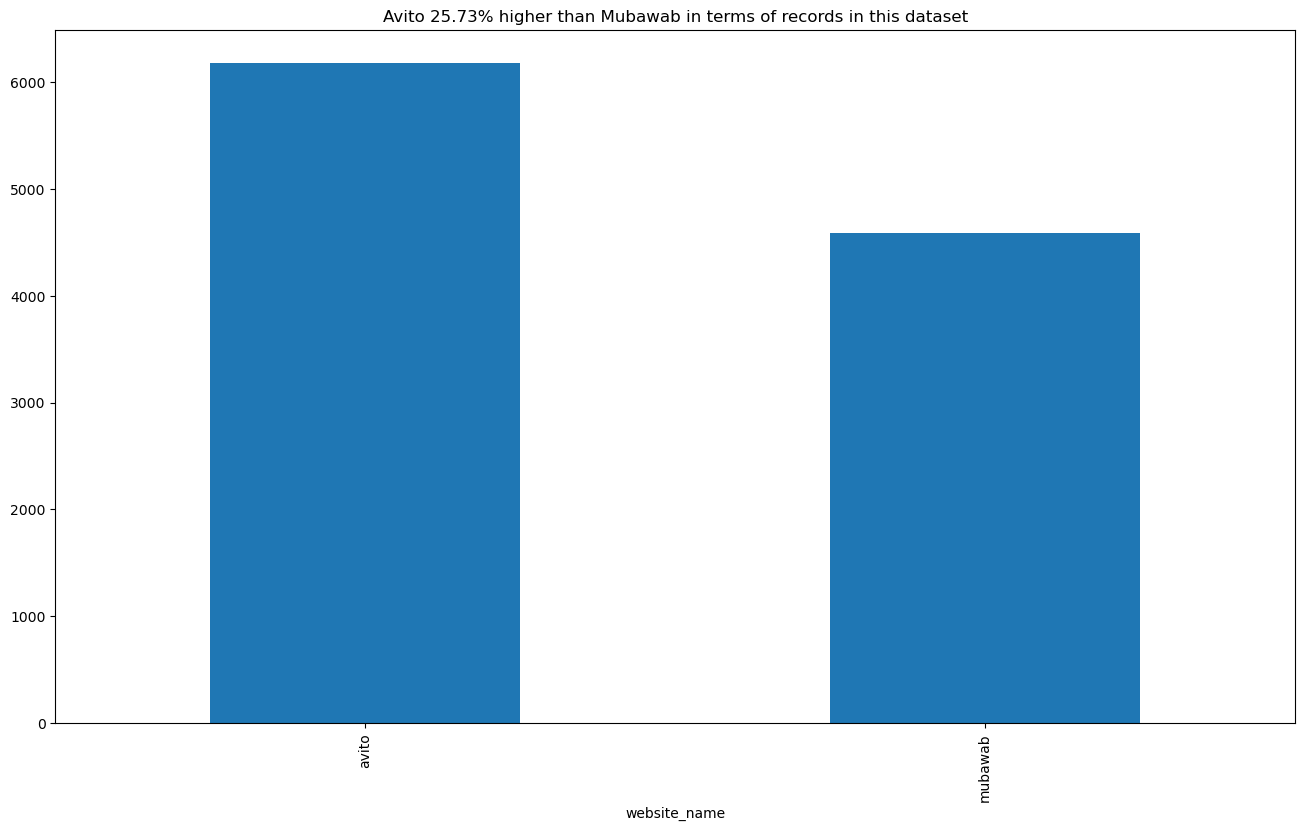

In [331]:
mh_dataset['website_name'].value_counts().plot(kind='bar')
plt.title(f"{highest_count['name'].capitalize()} {round(r, 2)}% higher than {lowest_count['name'].capitalize()} in terms of records in this dataset")
plt.show()

In [332]:
mh_dataset.rename(columns={"advertisement_url": "url"}, inplace=True)

## 3.5 'title' column cleaning

**Summary :**

- **Add** 'ad_type' column based on current column 'title', 'feature_list' column and 'price'.
- **Add** 'property_type' column based on current column 'title' and 'feature_list' column.
- **Add** 'property_surface_from_title_m²' column based on current column 'title'.

   --> so we can keep surface information if not exist in "feature_list" column.

- **Analyze** all titles by counting the most appeared words.
- **Analyze** the new column 'roperty_surface_from_title_m²', and gather new insight from it.

In [333]:
mh_dataset['title']

0          Arribat Center Appartement 1 chambres balcon 
1              Beach Sunset View Appartement 2 chambres 
2                        Appartement au coeur de Maârif 
3         Appartement élégant avec terrasse ensoleillée 
4        Appartement de 1 chambre ensoleillé à Gauthier 
                              ...                       
10765                          FOND DE COMMERCE A VENDRE
10766                  appartement pas loin de la plage 
10767                                     Terain malkia 
10768             Appartement de luxe ccorniche meramar 
10769             Ideal family Apartment for rent in fez
Name: title, Length: 10770, dtype: object

### 3.5 - 1/ Counting Unique Words :

I will create a "word counts" dictionary which will contain all ***unique words*** as keys and ***their occurrences*** as values.

This step will give us an ***overall overview*** of the titles in this dataset.

In [334]:
def get_unique_words(list, stop_words):
    # Combine all texts into one
    combined_text = " ".join(list)

    # Converte text to lowercase to ensure word comparison is not case sensitive + delete any character that is not a letter, number, or space.
    combined_text = re.sub(r'[^\w\s]', ' ', combined_text.lower())

    # Retrieve all words in the test
    words = combined_text.split()

    # Count the occurrences of each word
    unique_words_dict = Counter(words)

    filtered_dict = {key: value for key, value in unique_words_dict.items() if key not in stop_words}
    
    return filtered_dict

In [335]:
unique_words_from_titles = dict(get_unique_words(list(mh_dataset['title']), all_stop_words))

In [336]:
len(unique_words_from_titles)

5186

In [337]:
unique_words_from_titles = {k: v for k, v in unique_words_from_titles.items() if v>1 and not has_numbers(k) and k.capitalize() not in MOROCCAN_CITIES }

In [338]:
len(unique_words_from_titles)

1687

In [339]:
sorted_unique_words_from_titles = sorted(unique_words_from_titles.items(), key=lambda kv: kv[1], reverse=True)

In [340]:
sorted_unique_words_from_titles

[('appartement', 5164),
 ('louer', 2077),
 ('m²', 2046),
 ('vendre', 1892),
 ('location', 1385),
 ('villa', 1054),
 ('chambres', 988),
 ('meublé', 980),
 ('vente', 647),
 ('studio', 538),
 ('vacances', 456),
 ('bel', 447),
 ('asilah', 417),
 ('surface', 411),
 ('pièces', 409),
 ('appartements', 399),
 ('terrain', 393),
 ('piscine', 374),
 ('terrasse', 373),
 ('vue', 354),
 ('hay', 339),
 ('شقة', 336),
 ('centre', 330),
 ('appart', 314),
 ('résidence', 310),
 ('salon', 305),
 ('neuf', 284),
 ('ville', 267),
 ('saisonnière', 238),
 ('للبيع', 231),
 ('porte', 228),
 ('belle', 226),
 ('mer', 225),
 ('jardin', 225),
 ('blindée', 221),
 ('bureau', 220),
 ('standing', 218),
 ('vide', 208),
 ('superficie', 203),
 ('totale', 198),
 ('luxe', 195),
 ('tanger', 191),
 ('très', 190),
 ('superbe', 189),
 ('antenne', 188),
 ('parabolique', 188),
 ('haut', 188),
 ('ascenseur', 187),
 ('bien', 186),
 ('magnifique', 180),
 ('للكراء', 178),
 ('maison', 171),
 ('chambre', 169),
 ('belles', 165),
 ('maroca

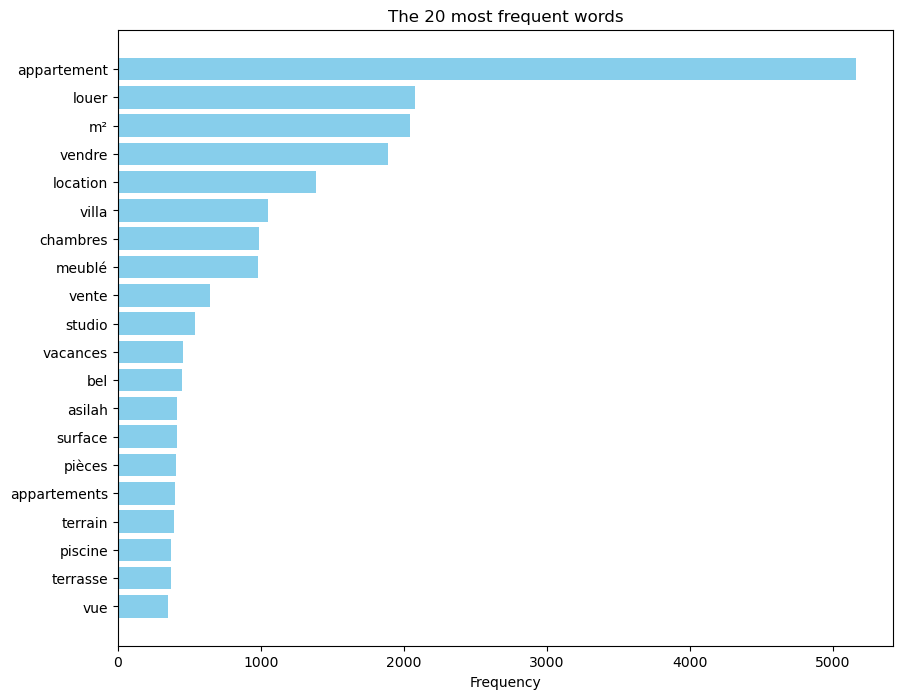

In [341]:
words, frequencies = zip(*sorted_unique_words_from_titles[:20])  # Les 20 mots les plus fréquents

plt.figure(figsize=(10, 8))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.title('The 20 most frequent words')
plt.gca().invert_yaxis()
plt.show()

In [342]:
from wordcloud import WordCloud

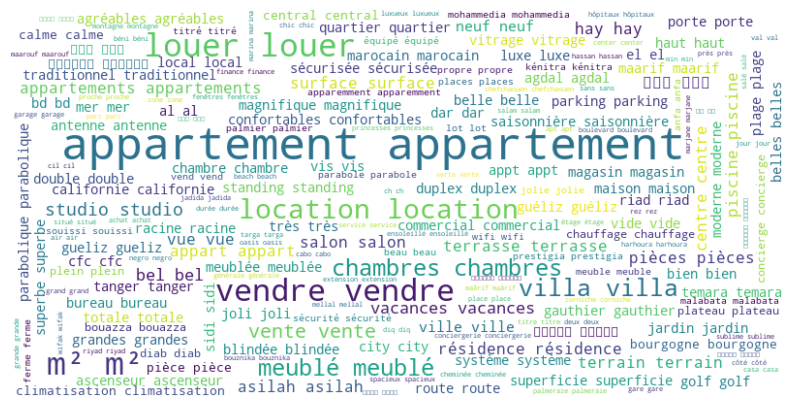

In [343]:
wordcloud_text = ' '.join([word for word, freq in sorted_unique_words_from_titles for _ in range(freq)])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [344]:
specific_stop_words = {"m²", "bel", "al", "el", "très", "bien", "hay","haut","belles","quartier","eden","vue","belle","badr","sidi","db","rak","racine","في","pièces","magnifique","beau","mhd","val","agréable","hills","lot","apparemment","plein","route","jnane"}

In [345]:
sorted_unique_words_from_titles = {key: value for key, value in dict(sorted_unique_words_from_titles).items() if key not in specific_stop_words}
sorted_unique_words_from_titles = sorted(sorted_unique_words_from_titles.items(), key=lambda kv: kv[1], reverse=True)

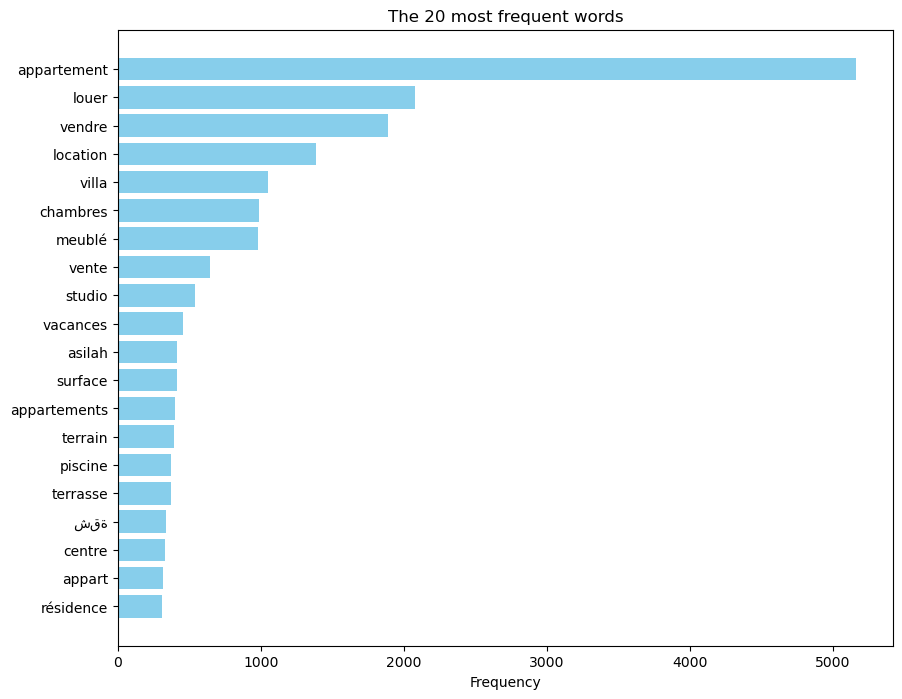

In [346]:
words, frequencies = zip(*sorted_unique_words_from_titles[:20])  # Les 20 mots les plus fréquents

plt.figure(figsize=(10, 8))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.title('The 20 most frequent words')
plt.gca().invert_yaxis()
plt.show()

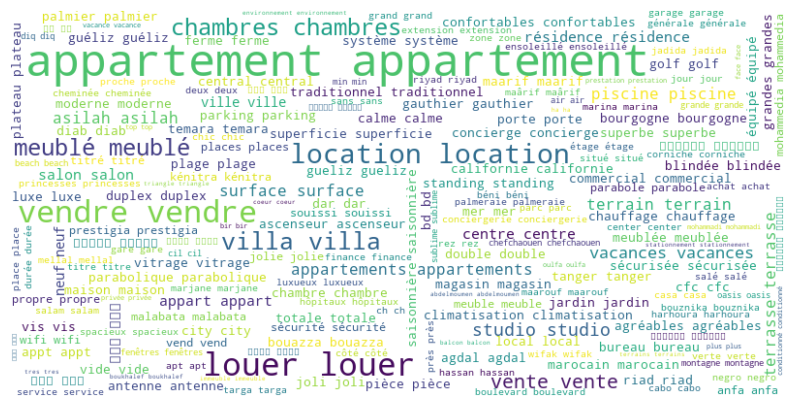

In [347]:
wordcloud_text = ' '.join([word for word, freq in sorted_unique_words_from_titles for _ in range(freq)])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(wordcloud_text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 3.5 - 2/ Extract the type of the ad (Sale/Rental/Vocation Rental) from the title AND JUST FOR AVITO RECORS:

because, We have scraped data from the Mubawab platform in an organized manner, as the sales, rental, and vacation rental announcements are categorized separately. BUT ON AVITO PLATFORM, announcements are not orginized so we need to extract the type of the announcement.

In [348]:
# def extract_ad_type_based_on_title_and_features_list_and_price_columns(title, features_list, price, dictionary):
    
#     # IF the type of advertisement concerns the “Sale” of real estate. 
#     words = title.lower().split()
#     #     search for sales words entered by users ...
#     for word in words:
#         normalized_word = dictionary.get(word, None)
#         if normalized_word:
#             return normalized_word

#     # IF NOT A SALE AD, we are going to check if it's a Rental Vocation Ad.
#     if 'night' in price.lower() or 'day' in price.lower() or 'nuit' in price.lower() or 'jour' in price.lower() or 'vacance' in title.lower() or 'locations de vacances' in features_list.lower():
#         return 'Vacation Rentals'

#     if 'location' in title.lower() or 'loue' in title.lower() or 'rent' in title.lower() or 'rent' in features_list.lower() or 'location' in features_list.lower():
#         return 'Rentals'
        
#     return 'Others'

In [349]:
def extract_ad_type(title, features_list, price, complete_description):
    
    # IF the type of advertisement concerns the “Sale” of real estate. 
    sales_keywords = ['sell', 'sels', 'sells', 'sold', 'selling', 'sale', 'sall', 'vend', 'vent', 'بيع', 'للبيع']
    if any(keyword in title.lower() for keyword in sales_keywords) or any(keyword in features_list.lower() for keyword in sales_keywords) or any(keyword in complete_description.lower() for keyword in sales_keywords):
        return 'Sales'
    
    # Check for vacation rental keywords in price, features list and title columns.
    price_keywords = ['night', 'day', 'nuit', 'jour']
    if any(keyword in price.lower() for keyword in price_keywords) or 'vacance' in title.lower() or 'locations de vacances' in features_list.lower():
        return 'Vacation Rentals'

    # Check for rental keywords in title and features list
    rental_keywords = ['location', 'loue', 'rent', "كراء"]
    if any(keyword in title.lower() for keyword in rental_keywords) or any(keyword in features_list.lower() for keyword in rental_keywords):
        return 'Rentals'

    if 'locations de vacances' in complete_description.lower() or 'Vacation Rentals' in complete_description.lower():
        return 'Vacation Rentals'

    if any(keyword in complete_description.lower() for keyword in rental_keywords):
        return 'Rentals'
        
    return 'Others'

In [350]:
mh_dataset['ad_type'] = mh_dataset.apply(lambda row: extract_ad_type(row['title'], row['features_list'], row['price'], row['complete_description']) if row['website_name'] == 'avito' else row['ad_type'], axis=1)

<Axes: xlabel='ad_type'>

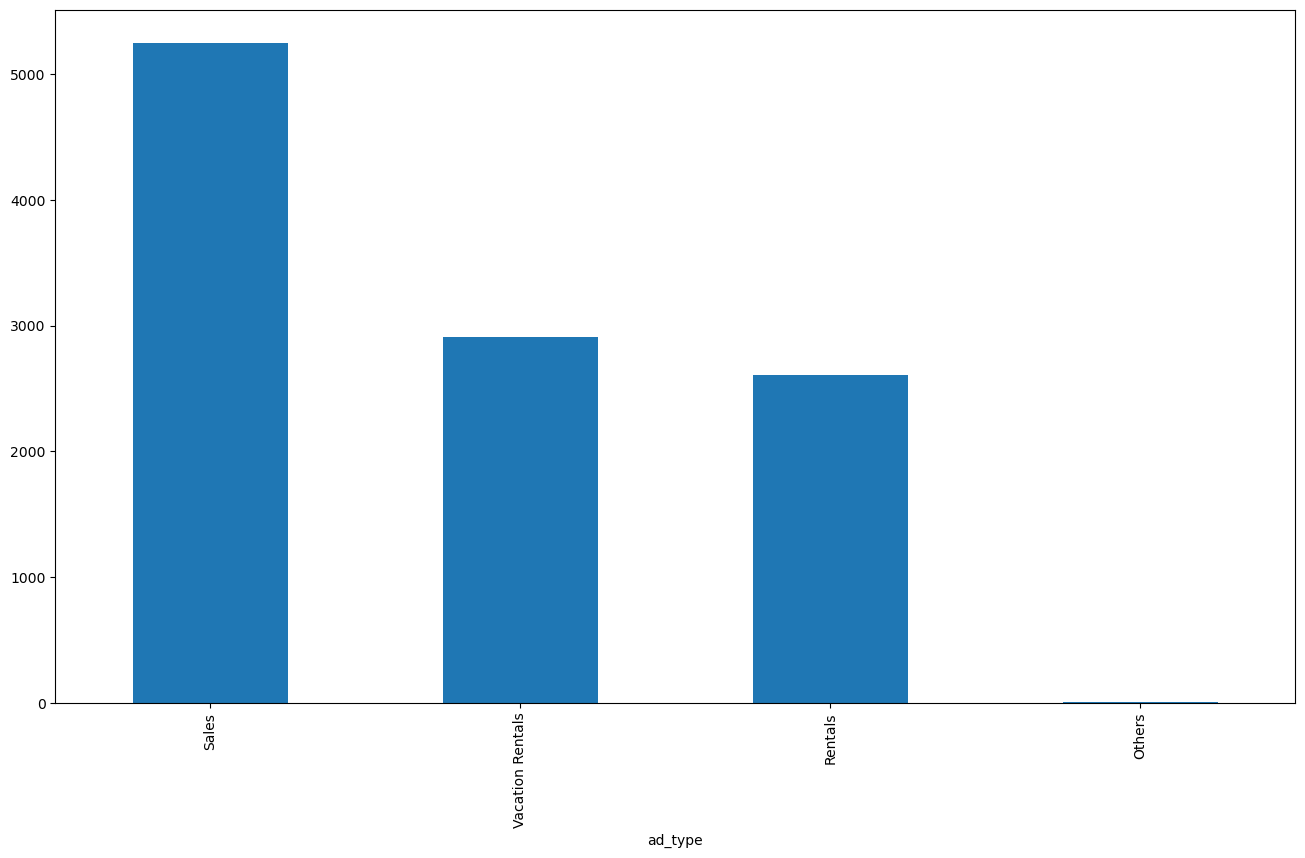

In [351]:
mh_dataset['ad_type'].value_counts().plot(kind="bar")

### 3.5 - 3/ Extract the surface of the property:

In [352]:
def extract_property_surface(title, description, complete_description, features_list):
    property_surface_pattern_for_french_and_english_language = r'\b(\d+)\s*m²\b'
    property_surface_pattern_for_french_and_english_language_version_2 = r'\b(\d+)\s*m\b'
    property_surface_pattern_for_arabic_language = r'\b(\d+)\s*م\b'
    try :
        match = re.search(property_surface_pattern_for_french_and_english_language, title)
        if match:
            return int(match.group(1))
    except:
        pass
    try :
        match = re.search(property_surface_pattern_for_french_and_english_language, description)
        if match:
            return int(match.group(1))
    except:
        pass
    try :
        match = re.search(property_surface_pattern_for_french_and_english_language, complete_description)
        if match:
            return int(match.group(1))
    except:
        pass
    """ 
    in feature list field sometimes we found surface expressed as 'Surface habitale': 
    [ ...... ;Âge du bien;Neuf;Surface habitable;55;Étage;4; ....]
    so to retrieve this information :
    """
    try :
        features = features_list.split(";")
        for index, feature in enumerate(features):
            if "surface" in feature.lower():
                return features[index+1]
    except:
        pass
        
    try :
        match = re.search(property_surface_pattern_for_arabic_language, title)
        if match:
            return int(match.group(1))
    except:
        pass
        
    try :
        match = re.search(property_surface_pattern_for_arabic_language, description)
        if match:
            return int(match.group(1))
    except:
        pass
        
    try :
        match = re.search(property_surface_pattern_for_arabic_language, complete_description)
        if match:
            return int(match.group(1))
    except:
        pass
    

    try :
        match = re.search(property_surface_pattern_for_french_and_english_language_version_2, description)
        if match:
            return int(match.group(1))
    except:
        pass
    
    try :
        match = re.search(property_surface_pattern_for_french_and_english_language_version_2, complete_description)
        if match:
            return int(match.group(1))
    except:
        pass

    try :
        match = re.search(property_surface_pattern_for_french_and_english_language_version_2, features_list)
        if match:
            return int(match.group(1))
    except:
        pass
    
    return None

In [353]:
mh_dataset['property_surface_m²'] = mh_dataset.apply(lambda row: extract_property_surface(row['title'], row['description'], row['complete_description'], row['features_list']), axis=1)

In [354]:
mh_dataset['property_surface_m²'].describe()

count     9190
unique     999
top         80
freq       300
Name: property_surface_m², dtype: int64

In [355]:
sum(mh_dataset['property_surface_m²'].isna()), len(mh_dataset['property_surface_m²'])

(1580, 10770)

In [356]:
mh_dataset[['property_surface_m²', 'website_name']].head(3)

,property_surface_m²,website_name
0,48,mubawab
1,120,mubawab
2,60,mubawab


In [357]:
sub_set = mh_dataset[['property_surface_m²', 'website_name']]

In [358]:
sub_set['property_surface_m²'] = sub_set['property_surface_m²'].apply(lambda x: int(x) if isinstance(x, str) else x)

C:\Users\AFANDI Soufiane\AppData\Local\Temp\ipykernel_4392\1497014881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_set['property_surface_m²'] = sub_set['property_surface_m²'].apply(lambda x: int(x) if isinstance(x, str) else x)


In [359]:
sub_set = sub_set[sub_set['property_surface_m²']  < 1000 ]

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


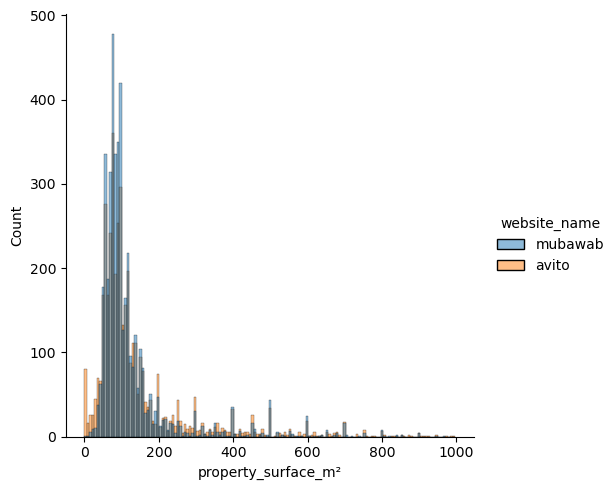

In [360]:
sns.displot(sub_set, x='property_surface_m²', hue='website_name')

In [361]:
sub_set = sub_set[sub_set['property_surface_m²']  < 300 ]

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'The majority of properties have a surface area between 50 m² and 175 m²')

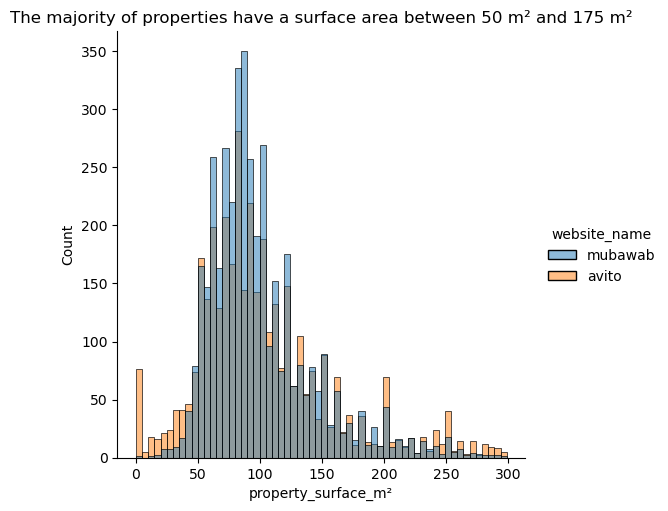

In [362]:
sns.displot(sub_set, x='property_surface_m²', hue='website_name')
plt.title("The majority of properties have a surface area between 50 m² and 175 m²")

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'The majority of properties have a surface area between 50 m² and 175 m²')

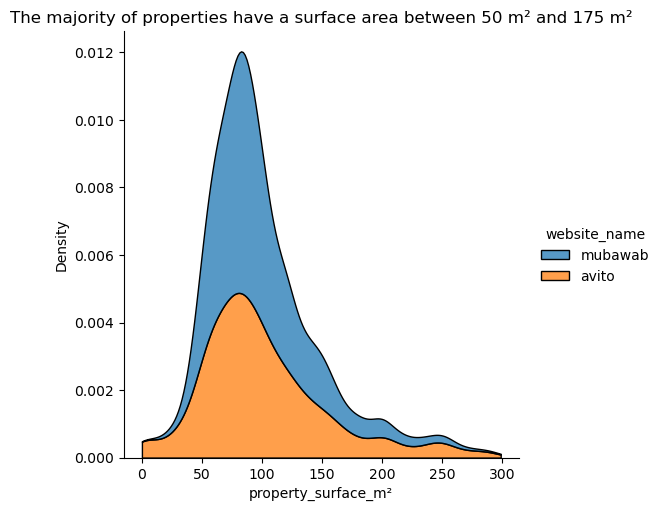

In [363]:
# Kernel density estimation
sns.displot(sub_set, x='property_surface_m²', hue='website_name', kind="kde", multiple="stack", cut=0)
plt.title("The majority of properties have a surface area between 50 m² and 175 m²")

### 3.5 - 4/ Extract the type of the property:

In [364]:
mh_dataset.head(1)

,url,title,publication_date,price,location,features_list,insert_date,ad_type,description,complete_description,website_name,property_surface_m²
0,https://www.mubawab.ma/fr/a/7808436/arribat-center-appartement-1-chambres-balcon,Arribat Center Appartement 1 chambres balcon,Publié aujourdhui,849 DH par jour,Agdal à Rabat,Type de bien;Appartement;Etat ;Bon état;Étage du bien;1er;Orientation;Ouest;Type du sol;Carrelage,2024-05-23 11:41:46,Vacation Rentals,48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Capacité: 3;1 nuits min.,"Ces appartements nouvellement construits offrent la combinaison parfaite entre beauté et praticité, situés juste à côté du centre commercial de Rabat ""Arribat Center"", avec un emplacement stratégique au cœur d'Agdal. Nous veillerons à ce que vous passiez un séjour merveilleux à chaque visite.",mubawab,48


In [365]:
def extract_property_type(title, features_list, complete_description):
    title__ =  title.lower()
    features_list__ = features_list.lower()
    complete_description__ = complete_description.lower() 

    apartments_keywords = ['apartment', 'apart', 'aprt', 'aprtmnt', 'aprtment', 'apprt', 'appart', 'appartement', 'appartment', 'duplex', 'triplex', 'studio', 'شقة', 'Partmat', 'شقق', 'برتمات', 'partmat']
    land_and_farms_keywords = ['land', 'farm', 'terrain', 'terain', 'teran', 'ferm', 'firm', 'ranche', 'أرض', 'مزرعة']
    houses_keywords = ['house', 'hous', 'maison', 'cottage', 'chalet', 'منزل']
    villas_riads_keywords = ['villa', 'vila', 'riad', 'riyad', 'ryad', 'castle', 'château', 'فيلا', 'رياض']
    desks_keywords = ['desktop', 'desk', 'desc', 'disk', 'bureau', 'office', 'مكتب']
    flatsharing_keywords = ['flatsharing', 'flatshar', 'colocation', 'roommate', 'romate', 'roommat', 'roomat']
    warehouse_keywords = ['magasin', 'store', 'stor', 'warehouse', 'warehous', 'warehouse', 'storehouse', 'magazine', 'magazin', 'مستودع']
    room_keywords = ['room', 'rom', 'rooom', 'chambre', 'chmbre', 'chmbr', 'غرفة', 'حجرة']

    
    if any(keyword in title__ for keyword in apartments_keywords):
        return 'Apartments'
    elif any(keyword in title__ for keyword in land_and_farms_keywords):
        return 'Land and Farms'
    elif any(keyword in title__ for keyword in houses_keywords):
        return 'Houses'
    elif any(keyword in title__ for keyword in villas_riads_keywords):
        return 'Villas and Riads'    
    elif any(keyword in title__ for keyword in desks_keywords):
        return 'Desks'
    elif any(keyword in title__ for keyword in flatsharing_keywords):
        return "Flatsharing"
    elif any(keyword in title__ for keyword in warehouse_keywords):
        return "Warehouses"
    elif any(keyword in title__ for keyword in room_keywords):
        return "Rooms"
    elif any(keyword in features_list__ for keyword in apartments_keywords):
        return 'Apartments'
    elif any(keyword in features_list__ for keyword in land_and_farms_keywords):
        return 'Land and Farms'
    elif any(keyword in features_list__ for keyword in houses_keywords):
        return 'Houses'
    elif any(keyword in features_list__ for keyword in villas_riads_keywords):
        return 'Villas and Riads'    
    elif any(keyword in features_list__ for keyword in desks_keywords):
        return 'Desks'
    elif any(keyword in features_list__ for keyword in flatsharing_keywords):
        return "Flatsharing"
    elif any(keyword in features_list__ for keyword in warehouse_keywords):
        return "Warehouses"
    elif any(keyword in complete_description__ for keyword in apartments_keywords):
        return 'Apartments'
    elif any(keyword in complete_description__ for keyword in land_and_farms_keywords):
        return 'Land and Farms'
    elif any(keyword in complete_description__ for keyword in houses_keywords):
        return 'Houses'
    elif any(keyword in complete_description__ for keyword in villas_riads_keywords):
        return 'Villas and Riads'    
    elif any(keyword in complete_description__ for keyword in desks_keywords):
        return 'Desks'
    elif any(keyword in complete_description__ for keyword in flatsharing_keywords):
        return "Flatsharing"
    elif any(keyword in complete_description__ for keyword in warehouse_keywords):
        return "Warehouses"
    else:
        try :
            features = features_list.split(";")
            for index, feature in enumerate(features):
                if "Type de bien".lower() in feature.lower() and any(keyword in features[index+1].lower() for keyword in room_keywords):
                    return "Rooms"
        except:
            pass
    return "Other Real Estate"

In [366]:
mh_dataset['property_type'] = mh_dataset.apply(lambda row: extract_property_type(row['title'], row['features_list'], row['complete_description']), axis=1)

In [367]:
unique_property_type_values = mh_dataset['property_type'].unique()
unique_property_type_values

array(['Apartments', 'Villas and Riads', 'Houses', 'Rooms',
       'Land and Farms', 'Desks', 'Flatsharing', 'Warehouses',
       'Other Real Estate'], dtype=object)

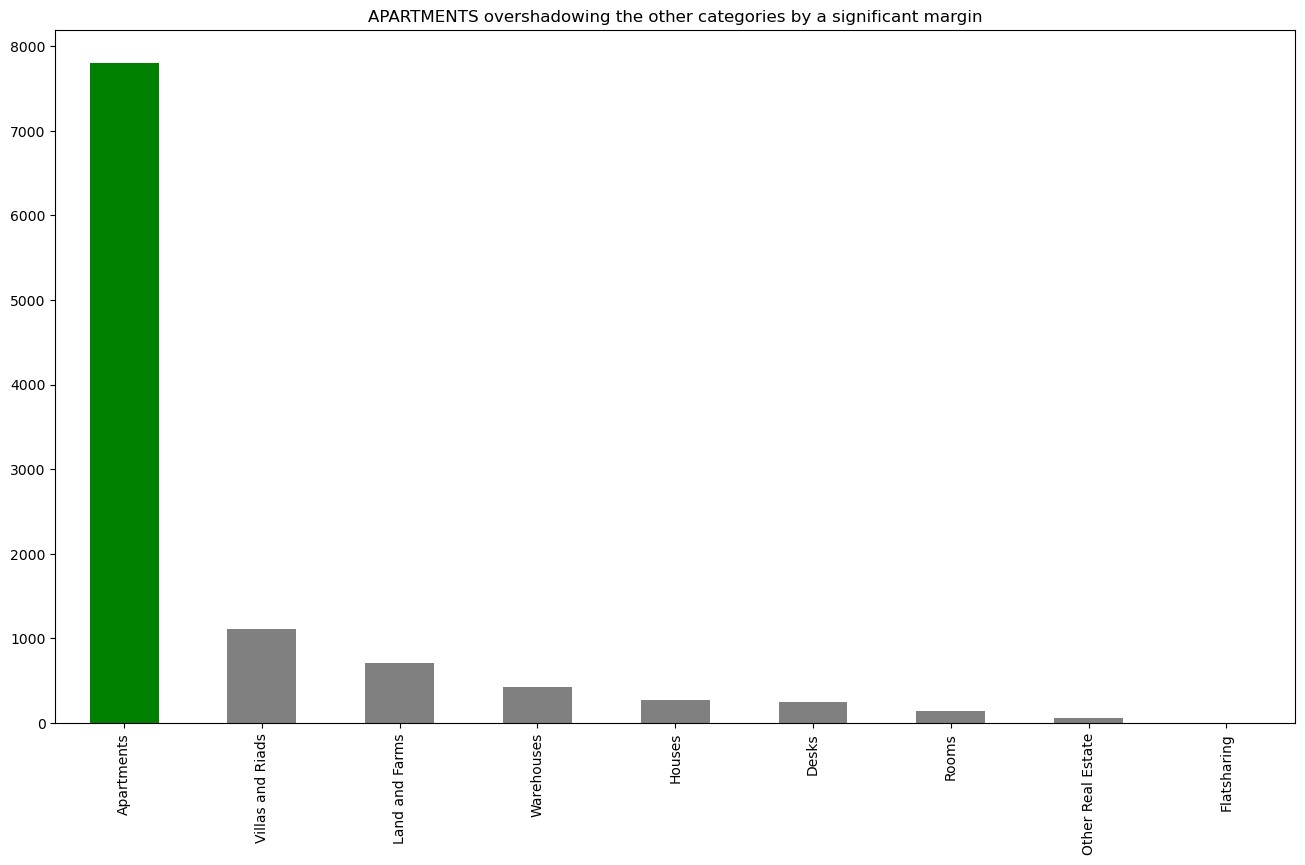

In [368]:
colors = ["g"] + ["gray"] * (len(unique_property_type_values)-1)
mh_dataset['property_type'].value_counts().plot(kind="bar", xlabel="", color=colors)
plt.title("APARTMENTS overshadowing the other categories by a significant margin")
plt.show()

In [369]:
mh_dataset.head(1)

,url,title,publication_date,price,location,features_list,insert_date,ad_type,description,complete_description,website_name,property_surface_m²,property_type
0,https://www.mubawab.ma/fr/a/7808436/arribat-center-appartement-1-chambres-balcon,Arribat Center Appartement 1 chambres balcon,Publié aujourdhui,849 DH par jour,Agdal à Rabat,Type de bien;Appartement;Etat ;Bon état;Étage du bien;1er;Orientation;Ouest;Type du sol;Carrelage,2024-05-23 11:41:46,Vacation Rentals,48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Capacité: 3;1 nuits min.,"Ces appartements nouvellement construits offrent la combinaison parfaite entre beauté et praticité, situés juste à côté du centre commercial de Rabat ""Arribat Center"", avec un emplacement stratégique au cœur d'Agdal. Nous veillerons à ce que vous passiez un séjour merveilleux à chaque visite.",mubawab,48,Apartments


## 3.6 'publication_date' column cleaning

**Summary :**

- Added year, month, day of publication columns based on current column 'publication_date' and 'insert_date'.

In [370]:
mh_dataset['publication_date']

0        Publié aujourdhui
1        Publié aujourdhui
2        Publié aujourdhui
3        Publié aujourdhui
4        Publié aujourdhui
               ...        
10765       il y a 5 jours
10766       il y a 5 jours
10767       il y a 5 jours
10768       il y a 5 jours
10769       il y a 5 jours
Name: publication_date, Length: 10770, dtype: object

In [371]:
mh_dataset['publication_date'].unique()

array(['Publié aujourdhui', 'Publié il y a 1 jour',
       'Publié il y a 4 jours', 'Publié il y a 3 jours',
       'Publié il y a 2 jours', 'Publié il y a 1 semaine',
       'Publié il y a 5 jours', 'Publié il y a 2 semaines',
       'Publié il y a 3 semaines', 'Publié il y a 4 semaines',
       'Publié il y a 1 mois', 'Publié il y a 2 mois',
       'Publié il y a 3 mois', 'Publié il y a 4 mois',
       'Publié il y a 5 mois', 'il y a 8 minutes', 'il y a 9 minutes',
       'il y a 21 minutes', 'il y a 26 minutes', 'il y a 20 minutes',
       'il y a 24 minutes', 'il y a 18 minutes', 'il y a 16 minutes',
       'il y a 33 minutes', 'il y a 28 minutes', 'il y a 29 minutes',
       'il y a 31 minutes', 'il y a 30 minutes', 'il y a 36 minutes',
       'il y a 37 minutes', 'il y a 41 minutes', 'il y a 35 minutes',
       'il y a 32 minutes', 'il y a 43 minutes', 'il y a 40 minutes',
       'il y a 45 minutes', 'il y a 39 minutes', 'il y a 42 minutes',
       'il y a 50 minutes', 'il y a 44

In [372]:
def convert_to_datetime(pub_date, insert_date):
    insert_date = insert_date.split(" ")[0]
    current_date = datetime.strptime(insert_date, "%Y-%m-%d")
    
    if 'aujourdhui' in pub_date:
        return current_date
        
    num_match = re.search(r'\d+', pub_date)
    if not num_match:
        return np.nan
    
    num = int(num_match.group())

    current_date = current_date + timedelta(hours=23, minutes=59) 
    if 'minute' in pub_date:
        return current_date - timedelta(minutes=num)
    elif 'heure' in pub_date or 'hour' in pub_date:
        return current_date - timedelta(hours=num)
    elif 'jour' in pub_date or 'day' in pub_date:
        return current_date - timedelta(days=num)
    elif 'semaine' in pub_date or 'week' in pub_date:
        return current_date - timedelta(weeks=num)
    elif 'mois' in pub_date or 'month' in pub_date:
        return current_date - relativedelta.relativedelta(months=num)
    elif 'année' in pub_date or 'year' in pub_date:
        return current_date - relativedelta.relativedelta(years=num)
    else:
        return np.nan

In [373]:
mh_dataset.rename(columns={'publication_date': 'ad_date'}, inplace=True)

In [374]:
mh_dataset.apply(lambda x: convert_to_datetime(x['ad_date'], x['insert_date']), axis=1)

0       2024-05-23 00:00:00
1       2024-05-23 00:00:00
2       2024-05-23 00:00:00
3       2024-05-23 00:00:00
4       2024-05-23 00:00:00
                ...        
10765   2024-05-25 23:59:00
10766   2024-05-25 23:59:00
10767   2024-05-25 23:59:00
10768   2024-05-25 23:59:00
10769   2024-05-25 23:59:00
Length: 10770, dtype: datetime64[ns]

In [375]:
mh_dataset['ad_date'] = mh_dataset.apply(lambda x: convert_to_datetime(x['ad_date'], x['insert_date']), axis=1)

In [376]:
mh_dataset['year'] = mh_dataset['ad_date'].apply(lambda x: x.year)
mh_dataset['month'] = mh_dataset['ad_date'].apply(lambda x: x.month)
mh_dataset['day'] = mh_dataset['ad_date'].apply(lambda x: x.day)

In [377]:
mh_dataset['ad_date'] = mh_dataset['ad_date'].apply(lambda x: str(x).split()[0])

In [378]:
mh_dataset.head(1)

,url,title,ad_date,price,location,features_list,insert_date,ad_type,description,complete_description,website_name,property_surface_m²,property_type,year,month,day
0,https://www.mubawab.ma/fr/a/7808436/arribat-center-appartement-1-chambres-balcon,Arribat Center Appartement 1 chambres balcon,2024-05-23,849 DH par jour,Agdal à Rabat,Type de bien;Appartement;Etat ;Bon état;Étage du bien;1er;Orientation;Ouest;Type du sol;Carrelage,2024-05-23 11:41:46,Vacation Rentals,48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Capacité: 3;1 nuits min.,"Ces appartements nouvellement construits offrent la combinaison parfaite entre beauté et praticité, situés juste à côté du centre commercial de Rabat ""Arribat Center"", avec un emplacement stratégique au cœur d'Agdal. Nous veillerons à ce que vous passiez un séjour merveilleux à chaque visite.",mubawab,48,Apartments,2024,5,23


## 3.7 'price' column cleaning

**Summary :**

- **add** 'property_price', 'price_currency', 'price per priod (for rental ad)' columns based on the current one.

In [379]:
mh_dataset['price']

0                                   849 DH par jour 
1        1 999 DH par jour   Baisse du prix 401 DH  
2                                   500 DH par jour 
3                                   799 DH par jour 
4                                   899 DH par jour 
                            ...                     
10765                              Prix non spécifié
10766                                   300 DH /Nuit
10767                              Prix non spécifié
10768                                   300 DH /Nuit
10769                                   300 DH /Nuit
Name: price, Length: 10770, dtype: object

In [380]:
mh_dataset['price'].unique()

array(['849 DH par jour ', '1 999 DH par jour   Baisse du prix 401 DH  ',
       '500 DH par jour ', ..., '206 433 DH', '1 850 DH', '2 350 000 DH'],
      dtype=object)

As we have noticed, there are multiple forms of price descriptions in our dataset:

- **Regular Form**: The price of the property followed by its currency (e.g., "1000 DH").

- **Rental Form**: For rental ads, the price may be specified per night. This can appear directly like the regular form (e.g., "150 DH") or with an additional string at the end of the price (e.g., "150 DH/Nuit" or "150 DH/Night").

- **Unspecified Price**: Sometimes, the ad owner does not specify the price, either for sale or rental, and this is indicated by strings like "Prix non spécifié" or left blank ("").

To handle these variations, we will standardize the price descriptions in our dataset, ensuring consistency and improving data quality.

In [381]:
def extract_price(price_description):
    
    # Patterns to match each different price descriptions
    regular_pattern = re.compile(r'\s*([\d\s]+)\s*(\w+)\s*', re.IGNORECASE)
    rental_pattern = re.compile(r'\s*([\d\s]+)\s*(\w+)\s*/\s*(\w+)\s*', re.IGNORECASE)
    unspecified_patterns = [re.compile(r'\s*prix\s*non\s*spécifié\s*', re.IGNORECASE),
                            re.compile(r'\s*non\s*spécifié\s*', re.IGNORECASE),
                            re.compile(r'\s*price\s*not\s*specified\s*', re.IGNORECASE),
                            re.compile(r'\s*not\s*specified\s*', re.IGNORECASE),
                            re.compile(r'\s*prix\s*à\s*consulter\s*', re.IGNORECASE),
                            re.compile(r'\s*gratuit\s*', re.IGNORECASE),
                            re.compile(r'\s*free\s*', re.IGNORECASE),
                            re.compile(r'^\s*$')]

    # Check for unspecified price first
    for pattern in unspecified_patterns:
        if pattern.match(price_description):
            return {'price': None, 'currency': None}

    # Check for rental form
    rental_match = rental_pattern.match(price_description)
    if rental_match:
        price, currency, period = rental_match.groups()
        return {'price': int(price.replace(" ", "")), 'currency': currency, 'period': period}

    # Check for regular form
    regular_match = regular_pattern.match(price_description)
    if regular_match:
        price, currency = regular_match.groups()
        return {'price': int(price.replace(" ", "")), 'currency': currency}

    return {'price': None, 'currency': None}

In [382]:
mh_dataset['price'].apply(lambda x: extract_price(x)).tolist()

[{'price': 849, 'currency': 'DH'},
 {'price': 1999, 'currency': 'DH'},
 {'price': 500, 'currency': 'DH'},
 {'price': 799, 'currency': 'DH'},
 {'price': 899, 'currency': 'DH'},
 {'price': 500, 'currency': 'DH'},
 {'price': 800, 'currency': 'DH'},
 {'price': 200, 'currency': 'DH'},
 {'price': None, 'currency': None},
 {'price': 500, 'currency': 'DH'},
 {'price': None, 'currency': None},
 {'price': 600, 'currency': 'DH'},
 {'price': 450, 'currency': 'DH'},
 {'price': 500, 'currency': 'DH'},
 {'price': 500, 'currency': 'DH'},
 {'price': 1000, 'currency': 'DH'},
 {'price': 15000, 'currency': 'DH'},
 {'price': 350, 'currency': 'DH'},
 {'price': 400, 'currency': 'DH'},
 {'price': 1000, 'currency': 'DH'},
 {'price': None, 'currency': None},
 {'price': 500, 'currency': 'DH'},
 {'price': 400, 'currency': 'DH'},
 {'price': 700, 'currency': 'DH'},
 {'price': 2000, 'currency': 'DH'},
 {'price': 999, 'currency': 'DH'},
 {'price': 799, 'currency': 'DH'},
 {'price': 799, 'currency': 'DH'},
 {'price': 

In [383]:
extracted_prices = pd.DataFrame(mh_dataset['price'].apply(lambda x: extract_price(x)).tolist())
extracted_prices.columns = ['property_price', 'price_currency', 'price_per_priod_(for_rental_ad)']
extracted_prices

,property_price,price_currency,price_per_priod_(for_rental_ad)
0,849.0,DH,NaN
1,1999.0,DH,NaN
2,500.0,DH,NaN
3,799.0,DH,NaN
4,899.0,DH,NaN
...,...,...,...
10765,NaN,None,NaN
10766,300.0,DH,Nuit
10767,NaN,None,NaN
10768,300.0,DH,Nuit


In [384]:
mh_dataset = mh_dataset.join(extracted_prices)
mh_dataset.head(2)

,url,title,ad_date,price,location,features_list,insert_date,ad_type,description,complete_description,website_name,property_surface_m²,property_type,year,month,day,property_price,price_currency,price_per_priod_(for_rental_ad)
0,https://www.mubawab.ma/fr/a/7808436/arribat-center-appartement-1-chambres-balcon,Arribat Center Appartement 1 chambres balcon,2024-05-23,849 DH par jour,Agdal à Rabat,Type de bien;Appartement;Etat ;Bon état;Étage du bien;1er;Orientation;Ouest;Type du sol;Carrelage,2024-05-23 11:41:46,Vacation Rentals,48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Capacité: 3;1 nuits min.,"Ces appartements nouvellement construits offrent la combinaison parfaite entre beauté et praticité, situés juste à côté du centre commercial de Rabat ""Arribat Center"", avec un emplacement stratégique au cœur d'Agdal. Nous veillerons à ce que vous passiez un séjour merveilleux à chaque visite.",mubawab,48,Apartments,2024,5,23,849.0,DH,NaN
1,https://www.mubawab.ma/fr/a/7808420/beach-sunset-view-appartement-2-chambres,Beach Sunset View Appartement 2 chambres,2024-05-23,1 999 DH par jour Baisse du prix 401 DH,Secteur Touristique à Agadir,Type de bien;Appartement;Etat ;Bon état;Étage du bien;2ème;Orientation;Nord;Type du sol;Carrelage,2024-05-23 11:42:09,Vacation Rentals,120 m² ;3 Pièces;2 Chambres;2 Salles de bains;Capacité: 6;1 nuits min.,"Nouvel appartement luxueux et relaxant de 2 chambres à Agadir pour les voyageurs appréciant le confort, décoré avec goût et souci du détail, offrant une vue époustouflante sur l'océan.",mubawab,120,Apartments,2024,5,23,1999.0,DH,NaN


In [385]:
del mh_dataset['price']

## 3.8 'location' column cleaning

**Summary :**

- **Clean** current column.
- **Visualize** data + **insight gathering**.

In [386]:
unique_cities_from_dataset = mh_dataset['location'].unique()
unique_cities_from_dataset[:6]

array(['Agdal à Rabat ', 'Secteur Touristique à Agadir ',
       'Maârif à Casablanca ', 'CIL (Hay Salam) à Casablanca ',
       'Gauthier à Casablanca ', 'Tanja Balia à Tanger '], dtype=object)

In [387]:
def extract_city_from_location(location):
    if 'à' in location:
        return location.split('à')[-1].strip()
    else:
        return location.strip()

In [388]:
mh_dataset['location'] = mh_dataset['location'].apply(lambda x: extract_city_from_location(x))

In [389]:
unique_cities_from_dataset = mh_dataset['location'].unique()
unique_cities_from_dataset

array(['Rabat', 'Agadir', 'Casablanca', 'Tanger', 'Cabo Negro',
       'Marrakech', 'Salé', 'Laäyoune', 'Mohammedia', 'Asilah', 'Martil',
       'Meknes', "M'Diq", 'Dar Bouazza', 'El Mansouria', 'Béni Yakhlef',
       'Mehdia', 'Fès', 'Sidi Bouknadel', 'Sidi Rahal Chatai',
       'El Jadida', 'Al Hoceima', 'Oujda', 'Essaouira', 'Azrou',
       'Taghazout', 'Ourika', 'Chefchaouen', 'Lagfifat', 'Béni Mellal',
       'Moulay Bousselham', 'Bouznika', 'Saïdia', 'Harhoura',
       'Sidi Bouzid', 'Kénitra', 'Skhirat', 'Safi', 'Oualidia', 'Temsia',
       'Benslimane', 'Tétouan', 'Ouislane', 'Ifrane', 'Sidi Rahal',
       'Oued Laou', 'Taroudant', 'Bouskoura', 'Larache', 'Nador',
       'Sidi Abdallah Ghiat', 'Aguerd', 'Sidi Ghanem', 'Agafay', 'Temara',
       'Tamesna', 'Laaouama', "M'sick", 'Tiznit', 'Al Barkanyene',
       'Berkane', 'Taghzout', 'Dakhla', 'Harbil', 'Errachidia',
       'Azemmour', 'Fnideq', 'Had Soualem', 'Ksar Sghir', 'Boukhalef',
       'Ouarzazate', 'Ain Attig', 'Sidi Mo

In [390]:
unique_cities_from_dataset = [x.lower() for x in unique_cities_from_dataset]

In [391]:
import json

In [392]:
file_json = open("./morocco-cities/cities_.json", encoding="utf8")
morocco_cities_dataset = json.load(file_json)

In [393]:
all_cities__ = []
temp_cities_from_dataset = unique_cities_from_dataset.copy()

for city_object in morocco_cities_dataset:
    
    if city_object["names"]['fr'].lower() in temp_cities_from_dataset:
        temp_cities_from_dataset.remove(city_object["names"]['fr'].lower())
        all_cities__.append(city_object["names"]['fr'])
        
    elif city_object["names"]['en'].lower() in temp_cities_from_dataset:
        temp_cities_from_dataset.remove(city_object["names"]['en'].lower())
        all_cities__.append(city_object["names"]['fr'])

    elif city_object["names"]['ar'] in temp_cities_from_dataset:
        temp_cities_from_dataset.remove(city_object["names"]['ar'].lower())
        all_cities__.append(city_object["names"]['fr'])
    
    else:
        pass

In [394]:
len(all_cities__), len(temp_cities_from_dataset), len(unique_cities_from_dataset)

(100, 94, 194)

In [395]:
temp_cities_from_dataset

['cabo negro',
 'laäyoune',
 'mohammedia',
 'asilah',
 'meknes',
 'dar bouazza',
 'el mansouria',
 'béni yakhlef',
 'sidi rahal chatai',
 'taghazout',
 'ourika',
 'lagfifat',
 'skhirat',
 'ouislane',
 'sidi rahal',
 'taroudant',
 'aguerd',
 'sidi ghanem',
 'agafay',
 'laaouama',
 "m'sick",
 'al barkanyene',
 'dakhla',
 'harbil',
 'had soualem',
 'ksar sghir',
 'boukhalef',
 'ain attig',
 'sidi moussa lhamri',
 'imsouane',
 'tassoultante',
 'nouaceur',
 'errahma',
 'el menzeh',
 'zenata',
 'meknassa acharqia',
 'tnine aglou',
 'مراكش',
 'al haouz',
 'timoulilt',
 'tifelt',
 'طنجة',
 'saidia',
 'fdalate',
 'al oioun sidi mellouk',
 'lamharza essahel',
 'ouled teïma',
 'القنيطرة',
 'tamaris',
 'mdiq',
 'sidi yahya zaer',
 'تمارة',
 'ksar es-seghir',
 'khemisset chaouia',
 'brachoua',
 'tamensourt',
 'sidi hajjaj oued hassar',
 'فاس',
 'laâyoune',
 'mers el kheir',
 'أكادير',
 'chtouka',
 'الدار البيضاء',
 'azla',
 'mirleft',
 'fquih ben saleh',
 'sidi hajjaj',
 'ain harrouda',
 'ouled ber

In [396]:
city_normalize_dic = {
    'cabo negro': 'cabo negro',
    'laäyoune':'laayoune',
    'mohammedia': 'mohammadia',
    'asilah':'assilah',
    'dar bouazza':'moulay bouazza',
     'el mansouria':'el mansouria',
     'béni yakhlef':'Ben Yakhlef',
     'sidi rahal chatai':'Sidi Rahhal Chatai',
     'sidi rahal':'sidi rahhal',
     'taghazout':'taghzout',
     'taghzot':'taghzout',
     'taghazot':'taghzout',
     'ourika':'ourika',
     'lagfifat':'lagfifat',
     'skhirat':'skhirate',
     'ouislane':'ouislane',
     'ويسلان':'ouislane',
     'taroudant':'Taroudannt',
     'aguerd':'aguerd',
     'sidi ghanem':'marrakech',
     'سيدي غانم':'marrakech',
     'agafay':'agafay',
     'laaouama':'laaouama ',
     "m'sick":'casablanca',
     'al barkanyene':'al barkanyene',
     'dakhla':'dakhla',
     'الداخلة':'dakhla',
     'harbil':'harbile',
     'حربيل':'harbile',
     'had soualem':'soualem',
     'السوالم':'soualem',
     'ksar sghir':'ksar sghir',
    'القصر الصغير':'ksar sghir',
     'boukhalef':'boukhalef',
    'بوخالف':'boukhalef',
     'ain attig':'aïn attig',
     'sidi moussa lhamri':'sidi moussa lhamri',
     'سيدي موسى الحمري':'sidi moussa lhamri',
     'سيدي الحمري':'sidi moussa lhamri',
     'موسى الحمري':'sidi moussa lhamri',
     'imsouane':'Imsouane',
     'إمسوان':'Imsouane',
     'tassoultante':'tassoultante',
     'تاسلطانت':'tassoultante',
     'nouaceur':'nouaceur',
     'النواصر':'nouaceur',
     'errahma':'errahma',
     'الرحمة':'errahma',
     'el menzeh':'el menzeh',
     'el-menzeh':'el menzeh',
     'menzeh':'el menzeh',
     'المنزه':'el menzeh',
     'zenata':'zenata',
     'meknassa acharqia':'meknassa acharqia',
     'tnine aglou':'tnine aglou',
     'تنين أݣلو':'tnine aglou',
     'al haouz':'al haouz',
     'el haouz':'al haouz',
     'haouz':'al haouz',
     'الحوز':'al haouz',
     'timoulilte':'timoulilte',
     'timoulilt':'timoulilte',
     'تيموليلت':'timoulilte',
     'tifelt':'tiflet',
     'tiffelt':'tiflet',
     'تيفلت':'tiflet',
     'saidia':'saïdia',
     'saidia':'saïdia',
     'fdalate':'fdalate',
     'فضالة':'fdalate',
     'al oioun sidi mellouk':'el aioun sidi mellouk',
     'el oioun sidi mellouk':'el aioun sidi mellouk',
     'el oioun mellouk':'el aioun sidi mellouk',
     'aioun sidi mellouk':'el aioun sidi mellouk',
     'oioun sidi mellouk':'el aioun sidi mellouk',
     'lamharza essahel':'lamharza essahel',
     'لمهارزة الساحل':'lamharza essahel',
     'ouled teïma':'oulad teima',
     'أولاد تايمة':'oulad teima',
     'tamaris':'tamaris',
     'mdiq':"m'diq",
     'mdik':"m'diq",
     'mdick':"m'diq",
     'mdi9':"m'diq",
     "m'dik":"m'diq",
     'sidi yahya zaer':'sidi yahya zaër',
     'ksar es-seghir':'ksar sghir',
     'القصر الصغير':'ksar sghir',
     'khemisset chaouia':'khemisset chaouia',
     'khemisset chaouia':'اخميسات الشاوية',
     'brachoua':'Had El Brachoua',
     'tamensourt':'tamansourt',
     'sidi hajjaj oued hassar':'sidi hajjaj oued hassar',
     'سيدي حجاج واد حصار':'sidi hajjaj oued hassar',
     'sidi hajjaj':'sidi hajjaj oued hassar',
     'laâyoune':'laayoune',
     'mers el kheir':'mers el kheir',
     'chtouka':'chtouka',
     'شتوكة':'chtouka',
     'azla':'azla',
     'azla':'azla',
     'mirleft':'أزلا',
     'fquih ben saleh':'fkih ben salah',
     'الفقيه بن صالح':'fkih ben salah',
     'ain harrouda':'ain harrouda',
     'Âïn-Harrouda':'ain harrouda',
     'ouled berhil':'Oulad Berhil',
     'issen':'issen',
     'oulad salah':'ouled saleh',
     'dcheïra el jihadia':'dcheira el jihadia',
     'oulad hamdane':'tlata ouled hamdane',
     'ولاد حمدان':'tlata ouled hamdane',
     'sidi boukhalkhal':'sidi boukhalkhal',
     'imouzzer-kendar':'imouzzer kandar',
     'imouzzer-kandar':'imouzzer kandar',
     'imouzzer kendar':'imouzzer kandar',
     'al aaroui':'al aroui',
     'al-aaroui':'al aroui',
     'al-aroui':'al aroui',
     'el aaroui':'al aroui',
     'el-aaroui':'al aroui',
     'el-aroui':'al aroui',
     'boufkrane':'boufekrane',
     'بوفكران':'boufekrane',
     'ain aouda':'ain el aouda',
     'ain al aouda':'ain el aouda',
     'souihla':'souihla',
     'السويهلة':'souihla',
     'sfassif':'sfassif',
     'el outia':'el ouatia',
     'al outia':'el ouatia',
     'el-outia':'el ouatia',
     'al-outia':'el ouatia',
     'الرباط':'rabat',
     'tafoughalt':'tafoughalt',
     'تافوغالت':'tafoughalt',
     'el beddouza':'el beddouza',
     'el-beddouza':'el beddouza',
     'al-beddouza':'el beddouza',
     'al beddouza':'el beddouza',
     'بدوزة':'el beddouza',
     'inzegan':'inezgane',
     'inzegane':'inezgane',
     'بوزنيقة':'bouznika',
     'ouled frej':'oulad frej',
     'merzouga':'merzouga',
     'مرزوقة':'merzouga',
     "mrir't":"Mrir't",
     "mrirt":"Mrir't",
     "مريرت":"Mrir't",
     'boulaouane':'boulaouane',
     'قصبة أبو الأعوان':'boulaouane',
     'أبو الأعوان':'boulaouane',
     'el kelâa des sraghna':'el kelaa des sraghna',
     'al kelaa des sraghna':'el kelaa des sraghna',
     'el kelâa de sraghna':'el kelaa des sraghna',
     'el kelaa d sraghna':'el kelaa des sraghna',
     'marchouch':'merchouch',
     'sidi yahya':'sidi yahya el gharb',
     'sidi yahya al gharb':'sidi yahya el gharb',
     'yahya el gharb':'sidi yahya el gharb',
     'sidi yahya gharb':'sidi yahya el gharb',
     'agadir melloul':'agadir melloul',
     'أڭادير ملول':'agadir melloul'
}

In [397]:
mh_dataset['location'] = mh_dataset['location'].apply(lambda x: city_normalize_dic[x].capitalize() if x in city_normalize_dic.keys() else x)

In [443]:
[ obj['names']['ar'] for obj in morocco_cities_dataset][3] in unique_cities_from_dataset

True

In [447]:
all_cities__ = []
unique_cities_from_dataset = [x.lower() for x in mh_dataset['location'].unique()]

for city_object in morocco_cities_dataset:
    
    fr_name = city_object["names"]['fr'].lower()
    en_name = city_object["names"]['en'].lower()
    ar_name = city_object["names"]['ar']
    
    if en_name in unique_cities_from_dataset:
        matched_idexes = mh_dataset['location'][mh_dataset['location'] == en_name].index
        if len(matched_idexes) != 0:
            mh_dataset.loc[matched_idexes,'location'] = fr_name

    if ar_name in unique_cities_from_dataset:
        matched_idexes = mh_dataset['location'][mh_dataset['location'] == ar_name].index
        if len(matched_idexes) != 0:
            mh_dataset.loc[matched_idexes,'location'] = fr_name

In [428]:
""" OLD list : containe new cities
['cabo negro',
 'laäyoune',
 'mohammedia',
 'asilah',
 'dar bouazza',
 'el mansouria',
 'béni yakhlef',
 'sidi rahal chatai',
 'taghazout',
 'ourika',
 'lagfifat',
 'skhirat',
 'ouislane',
 'sidi rahal',
 'taroudant',
 'aguerd',
 'sidi ghanem',
 'agafay',
 'laaouama',
 "m'sick",
 'al barkanyene',
 'dakhla',
 'harbil',
 'had soualem',
 'ksar sghir',
 'boukhalef',
 'ain attig',
 'sidi moussa lhamri',
 'imsouane',
 'tassoultante',
 'nouaceur',
 'errahma',
 'el menzeh',
 'zenata',
 'meknassa acharqia',
 'tnine aglou',
 'al haouz',
 'timoulilt',
 'tifelt',
 'saidia',
 'fdalate',
 'al oioun sidi mellouk',
 'lamharza essahel',
 'ouled teïma',
 'tamaris',
 'mdiq',
 'sidi yahya zaer',
 'ksar es-seghir',
 'khemisset chaouia',
 'brachoua',
 'tamensourt',
 'sidi hajjaj oued hassar',
 'laâyoune',
 'mers el kheir',
 'chtouka',
 'azla',
 'mirleft',
 'fquih ben saleh',
 'sidi hajjaj',
 'ain harrouda',
 'ouled berhil',
 'issen',
 'oulad salah',
 'dcheïra el jihadia',
 'oulad hamdane',
 'sidi boukhalkhal',
 'imouzzer-kendar',
 'al aaroui',
 'boufkrane',
 'ain aouda',
 'souihla',
 'sfassif',
 'el outia',
 'rabat',
 'tafoughalt',
 'el beddouza',
 'inzegan',
 'bouznika',
 'ouled frej',
 'merzouga',
 "mrir't",
 'boulaouane',
 'el kelâa des sraghna',
 'marchouch',
 'sidi yahya',
 'agadir melloul']
"""
# temp_cities_from_dataset

' OLD list : containe new cities\n[\'cabo negro\',\n \'laäyoune\',\n \'mohammedia\',\n \'asilah\',\n \'dar bouazza\',\n \'el mansouria\',\n \'béni yakhlef\',\n \'sidi rahal chatai\',\n \'taghazout\',\n \'ourika\',\n \'lagfifat\',\n \'skhirat\',\n \'ouislane\',\n \'sidi rahal\',\n \'taroudant\',\n \'aguerd\',\n \'sidi ghanem\',\n \'agafay\',\n \'laaouama\',\n "m\'sick",\n \'al barkanyene\',\n \'dakhla\',\n \'harbil\',\n \'had soualem\',\n \'ksar sghir\',\n \'boukhalef\',\n \'ain attig\',\n \'sidi moussa lhamri\',\n \'imsouane\',\n \'tassoultante\',\n \'nouaceur\',\n \'errahma\',\n \'el menzeh\',\n \'zenata\',\n \'meknassa acharqia\',\n \'tnine aglou\',\n \'al haouz\',\n \'timoulilt\',\n \'tifelt\',\n \'saidia\',\n \'fdalate\',\n \'al oioun sidi mellouk\',\n \'lamharza essahel\',\n \'ouled teïma\',\n \'tamaris\',\n \'mdiq\',\n \'sidi yahya zaer\',\n \'ksar es-seghir\',\n \'khemisset chaouia\',\n \'brachoua\',\n \'tamensourt\',\n \'sidi hajjaj oued hassar\',\n \'laâyoune\',\n \'mers el kh

In [448]:
mh_dataset['location'].unique()

array(['Rabat', 'Agadir', 'Casablanca', 'Tanger', 'Cabo Negro',
       'Marrakech', 'Salé', 'Laäyoune', 'Mohammedia', 'Asilah', 'Martil',
       'Meknes', "M'Diq", 'Dar Bouazza', 'El Mansouria', 'Béni Yakhlef',
       'Mehdia', 'Fès', 'Sidi Bouknadel', 'Sidi Rahal Chatai',
       'El Jadida', 'Al Hoceima', 'Oujda', 'Essaouira', 'Azrou',
       'Taghazout', 'Ourika', 'Chefchaouen', 'Lagfifat', 'Béni Mellal',
       'Moulay Bousselham', 'Bouznika', 'Saïdia', 'Harhoura',
       'Sidi Bouzid', 'Kénitra', 'Skhirat', 'Safi', 'Oualidia', 'Temsia',
       'Benslimane', 'Tétouan', 'Ouislane', 'Ifrane', 'Sidi Rahal',
       'Oued Laou', 'Taroudant', 'Bouskoura', 'Larache', 'Nador',
       'Sidi Abdallah Ghiat', 'Aguerd', 'Sidi Ghanem', 'Agafay', 'Temara',
       'Tamesna', 'Laaouama', "M'sick", 'Tiznit', 'Al Barkanyene',
       'Berkane', 'Taghzout', 'Dakhla', 'Harbil', 'Errachidia',
       'Azemmour', 'Fnideq', 'Had Soualem', 'Ksar Sghir', 'Boukhalef',
       'Ouarzazate', 'Ain Attig', 'Sidi Mo

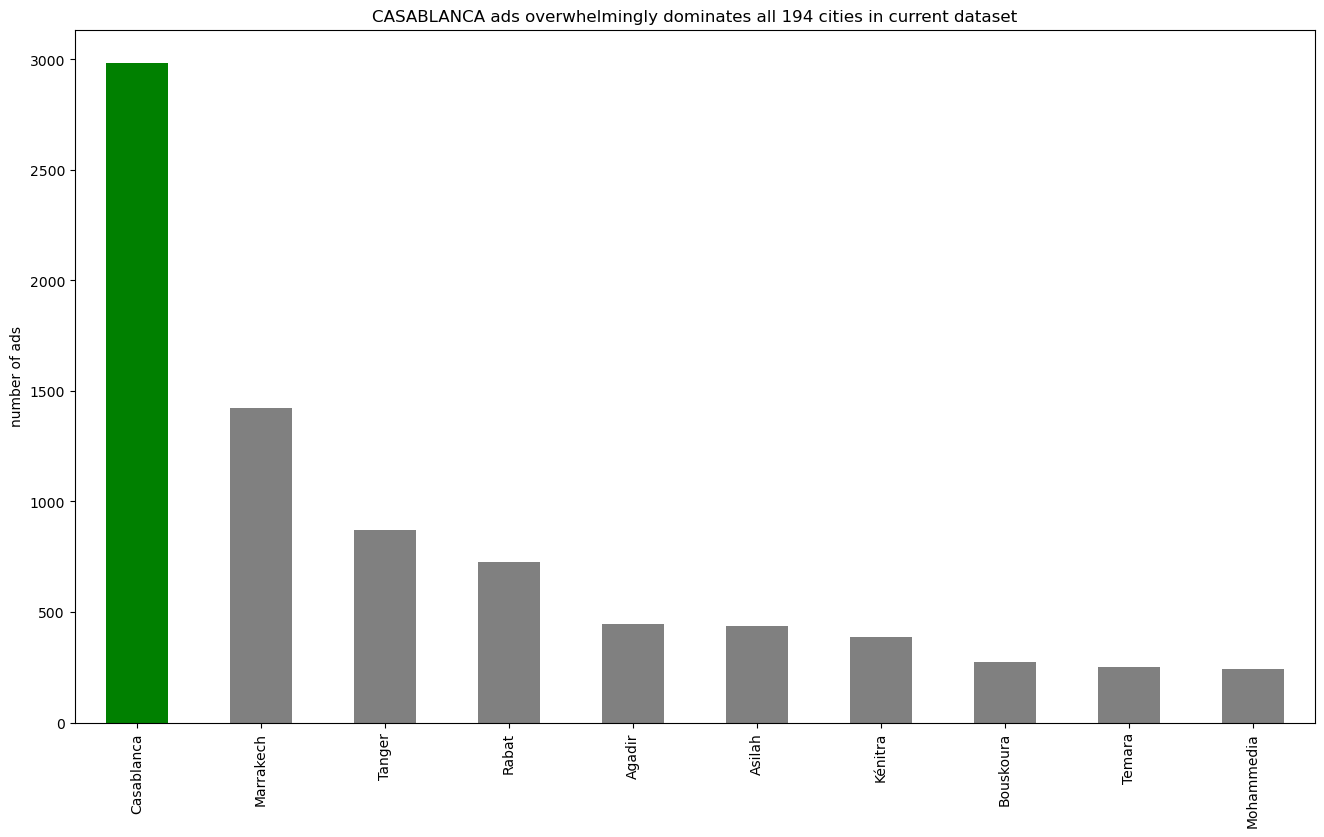

In [449]:
top_10_locations_in_current_dataset = mh_dataset['location'].value_counts().head(10)
colors = ['g'] + ['gray'] * (len(top_10_locations_in_current_dataset)-1)
top_10_locations_in_current_dataset.plot(kind="bar", xlabel='', ylabel='number of ads', color=colors)
plt.title(f'{top_10_locations_in_current_dataset.keys()[0].upper()} ads overwhelmingly dominates all {len(unique_cities)} cities in current dataset')
plt.show()

## 3.9 'description' column cleaning

**Summary :**

- **Add** 'number of rooms' column.

In [402]:
mh_dataset['description']

0             48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Capacité: 3;1 nuits min.
1         120 m² ;3 Pièces;2 Chambres;2 Salles de bains;Capacité: 6;1 nuits min.
2            60 m² ;1 Pièce ;1 Chambre;1 Salle de bain;Capacité: 2;10 nuits min.
3             50 m² ;2 Pièces;1 Chambre;1 Salle de bain;Capacité: 2;1 nuits min.
4             48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Capacité: 4;1 nuits min.
                                          ...                                   
10765                                                                        NaN
10766                                                                        NaN
10767                                                                        NaN
10768                                                                        NaN
10769                                                                        NaN
Name: description, Length: 10770, dtype: object

One of the most meaningful insight from this list of property descriptions is: 
the number of rooms.

So, let's extract this number.

In [403]:
mh_dataset['description']

0             48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Capacité: 3;1 nuits min.
1         120 m² ;3 Pièces;2 Chambres;2 Salles de bains;Capacité: 6;1 nuits min.
2            60 m² ;1 Pièce ;1 Chambre;1 Salle de bain;Capacité: 2;10 nuits min.
3             50 m² ;2 Pièces;1 Chambre;1 Salle de bain;Capacité: 2;1 nuits min.
4             48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Capacité: 4;1 nuits min.
                                          ...                                   
10765                                                                        NaN
10766                                                                        NaN
10767                                                                        NaN
10768                                                                        NaN
10769                                                                        NaN
Name: description, Length: 10770, dtype: object

In [404]:
def extract_rooms_number(description):
    description = str(description)
    if description == "":
        return np.nan
    
    pieces_match = re.search(r'(\d+)\s*Pièces?', description)
    if pieces_match:
        return int(pieces_match.group(1))
    
    chambres_match = re.search(r'(\d+)\s*Chambres?', description)
    if chambres_match:
        return int(chambres_match.group(1))
    
    return np.nan

In [405]:
mh_dataset['rooms_number'] = mh_dataset['description'].apply(lambda x: extract_rooms_number(x) )

In [406]:
mh_dataset['rooms_number'].describe()

count    4576.000000
mean        3.325830
std         2.394492
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        99.000000
Name: rooms_number, dtype: float64

C:\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


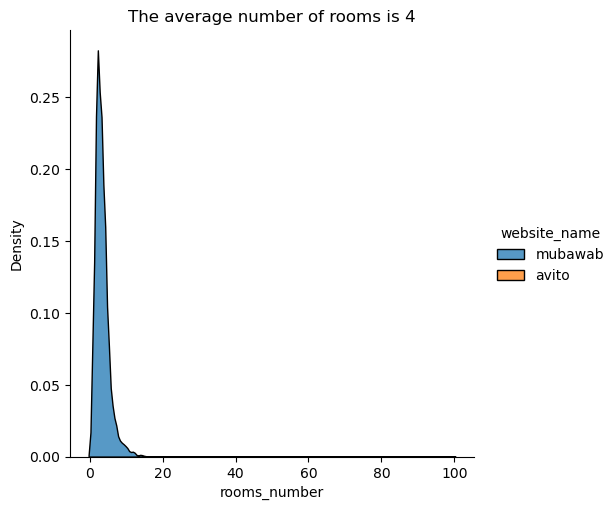

In [407]:
sns.displot(mh_dataset, x='rooms_number', hue='website_name', kind="kde", multiple="stack")
plt.title("The average number of rooms is 4")
plt.show()

# 4. More Cleaning

In [408]:
mh_dataset.head(1)

,url,title,ad_date,location,features_list,insert_date,ad_type,description,complete_description,website_name,property_surface_m²,property_type,year,month,day,property_price,price_currency,price_per_priod_(for_rental_ad),rooms_number
0,https://www.mubawab.ma/fr/a/7808436/arribat-center-appartement-1-chambres-balcon,Arribat Center Appartement 1 chambres balcon,2024-05-23,Rabat,Type de bien;Appartement;Etat ;Bon état;Étage du bien;1er;Orientation;Ouest;Type du sol;Carrelage,2024-05-23 11:41:46,Vacation Rentals,48 m² ;2 Pièces;1 Chambre;1 Salle de bain;Capacité: 3;1 nuits min.,"Ces appartements nouvellement construits offrent la combinaison parfaite entre beauté et praticité, situés juste à côté du centre commercial de Rabat ""Arribat Center"", avec un emplacement stratégique au cœur d'Agdal. Nous veillerons à ce que vous passiez un séjour merveilleux à chaque visite.",mubawab,48,Apartments,2024,5,23,849.0,DH,NaN,2.0


we are going to get ride of columns that are useless for future analysis.

- title
- description
- complete_description
- features_list
- insert_date

In [409]:
del mh_dataset["title"]
del mh_dataset["description"]
del mh_dataset["complete_description"]
del mh_dataset["features_list"]
del mh_dataset["insert_date"]

we gonna rename our columns :

In [410]:
mh_dataset.columns

Index(['url', 'ad_date', 'location', 'ad_type', 'website_name',
       'property_surface_m²', 'property_type', 'year', 'month', 'day',
       'property_price', 'price_currency', 'price_per_priod_(for_rental_ad)',
       'rooms_number'],
      dtype='object')

In [450]:
# mh_dataset.to_csv('market_housing_dateset.csv')

In [412]:
mh_dataset['ad_type'].unique()

array(['Vacation Rentals', 'Rentals', 'Sales', 'Others'], dtype=object)